In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import calendar
from sklearn import linear_model
import statsmodels.formula.api as smf

In [ ]:
# import note
notes = pd.read_parquet('notes.parquet', engine='auto')



In [ ]:
# limit notes to 2024 and before
notes = notes[notes.createdAt < pd.Timestamp(2025, 1, 1)]

In [3]:
users_no = len(notes['noteAuthorParticipantId'].unique())
print(f"Number of unique note authors: {users_no}")

first_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].min()/1000).\
    strftime("%B %d, %Y")
last_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].max()/1000).\
    strftime("%B %d, %Y")
print(f"The first note we have was created at {first_note_date} \
and the last one at {last_note_date}.")

Number of unique note authors: 215117
The first note we have was created at January 28, 2021 and the last one at January 01, 2025.


In [4]:
# notes per month and year
notes.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count()

createdAtYear  createdAtMonth
2021           1                    971
               2                   1939
               3                   1649
               4                   1229
               5                   1194
               6                   1256
               7                   1186
               8                   1685
               9                   1960
               10                  1819
               11                  1502
               12                  1187
2022           1                   1090
               2                    953
               3                   1008
               4                   1031
               5                   1821
               6                   1699
               7                   1147
               8                   1070
               9                    857
               10                  1377
               11                  3822
               12                  3589
2023      

In [5]:
# notes per year
notes.groupby(['createdAtYear'])['noteId'].count()

createdAtYear
2021      17577
2022      19464
2023     381096
2024    1093680
Name: noteId, dtype: int64

In [6]:
# active authors per year
notes.groupby(['createdAtYear']).agg({'noteAuthorParticipantId': 'nunique'}).reset_index()


,createdAtYear,noteAuthorParticipantId
0,2021,3042
1,2022,3616
2,2023,65998
3,2024,185734


In [7]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [8]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYear', 'createdAtMonth'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

In [9]:
active_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,378
1,2021,2,643
2,2021,3,575
3,2021,4,459
4,2021,5,330
5,2021,6,459
6,2021,7,442
7,2021,8,700
8,2021,9,823
9,2021,10,713


In [30]:
active_authors_monthly.index

RangeIndex(start=0, stop=48, step=1)

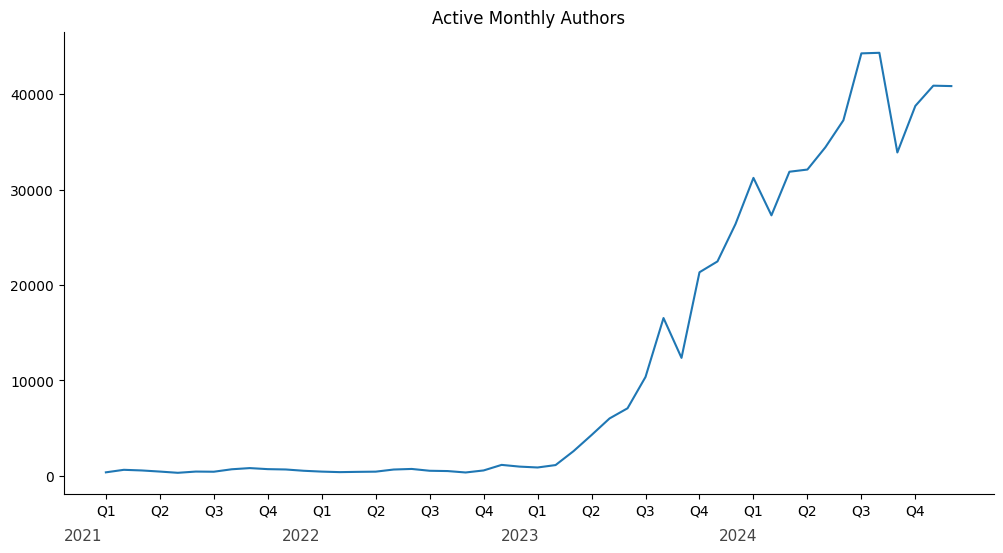

In [48]:
# plot active authors monthly
fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(active_authors_monthly.index,active_authors_monthly['count'])
ax.plot(active_authors_monthly['count'])

ax.set_xticks(np.arange(0,len(active_authors_monthly), step=3))
# set quartely labels
labels = [''] * len(ax.get_xticks())
for idx, element in enumerate(labels):
    labels[idx] = 'Q' + str(idx%4 + 1)

ax.set_xticklabels(labels)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.235 , -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_title('Active Monthly Authors')
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xlabel('Percentage of Authors')
# ax.set_ylabel('Proportion of Total Helpful Notes')

In [10]:
new_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,378
1,2021,2,434
2,2021,3,316
3,2021,4,156
4,2021,5,96
5,2021,6,164
6,2021,7,105
7,2021,8,352
8,2021,9,411
9,2021,10,296


To check if the community is alive because of new users or not, let's see new users vs active users per month.

In [11]:
notes['createdAtYM'] = notes['createdAt'].dt.to_period('M')


In [12]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYM'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [7]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYM'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

/tmp/ipykernel_8159/3181820702.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


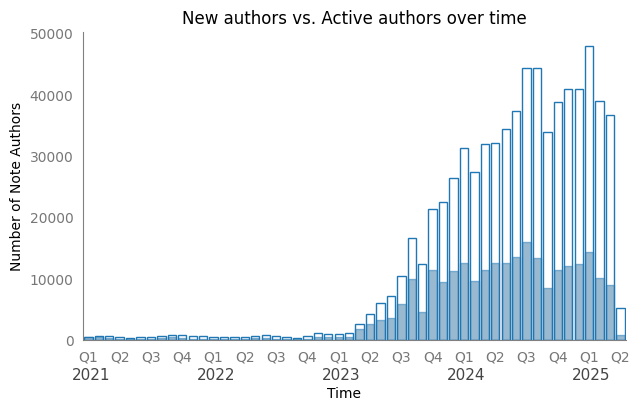

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
sns.barplot(x="createdAtYM", y="count", data=active_authors_monthly,
             color='white', edgecolor='tab:blue')
sns.barplot(x="createdAtYM", y="count", data=new_authors_monthly,
             edgecolor='tab:blue', alpha=.5)

# set quartely labels
labels = [''] * len(ax.get_xticklabels())
for idx, element in enumerate(labels[::3]):
    labels[idx*3] = 'Q' + str(idx%4 + 1)

ax.set_xticklabels(labels)
# add years
for idx, year in enumerate(range(2021,2026)):
    ax.text(idx*.23 -.02, -.13, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_xlabel('Time')
ax.xaxis.set_label_coords(.48, -.15)
ax.set_ylabel('Number of Note Authors')
ax.tick_params(axis='both', colors="#777777", left=False, bottom=False)
ax.spines[['bottom', 'left']].set_color("grey")
# ax.legend(['Unmet Demand', 'Capacity'])
ax.spines[['right', 'top']].set_visible(False)
#update last month
ax.set_title(f'New authors vs. Active authors over time')
# add keydates
plt.show()

Qustion: what percentage of note authors from 2021, 2022, 2023 are still authoring notes in 2024?

In [3]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}

for year in range(2021, 2025):
    distinct_authors_dict[year] = notes[notes['createdAtYear'] == year]['noteAuthorParticipantId'].unique()

In [32]:
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])


Text(0.5, 1.0, 'Fraction of authors who remained active after their first note')

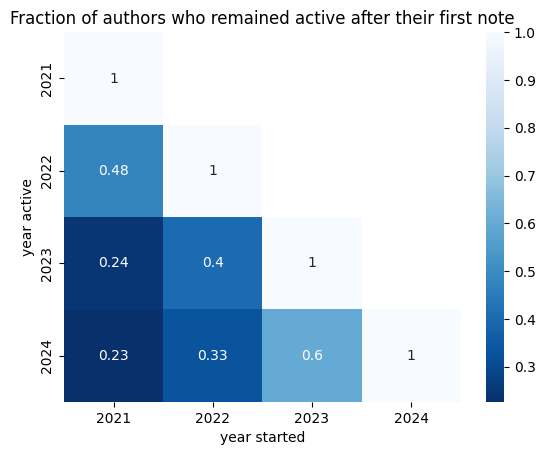

In [ ]:
# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title('Fraction of authors who remained active after their first note')


We want to know how the above heatmap look like for authors with more notes.

In [7]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}
# least number of notes the author have written
k = 5
df_k = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(k-1)]
for year in range(2021, 2025):
    distinct_authors_dict[year] = df_k[df_k['createdAtYear'] == year]['noteAuthorParticipantId'].unique()

In [8]:
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])


Text(0.5, 1.0, 'Fraction of 5+ authors who remained active after their first note')

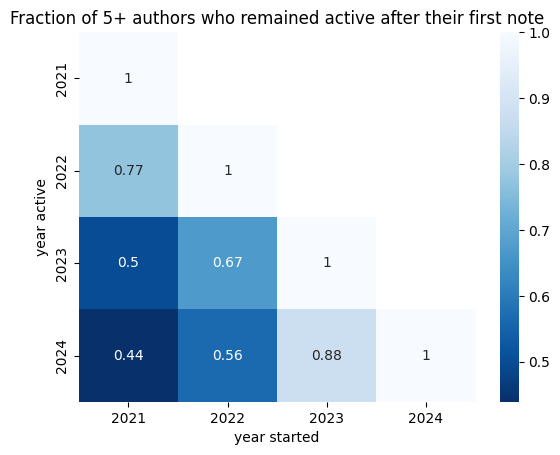

In [11]:
# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title(f'Fraction of {k}+ authors who remained active after their first note')


And for 10+ authors

Text(0.5, 1.0, 'Fraction of 10+ authors who remained active after their first note')

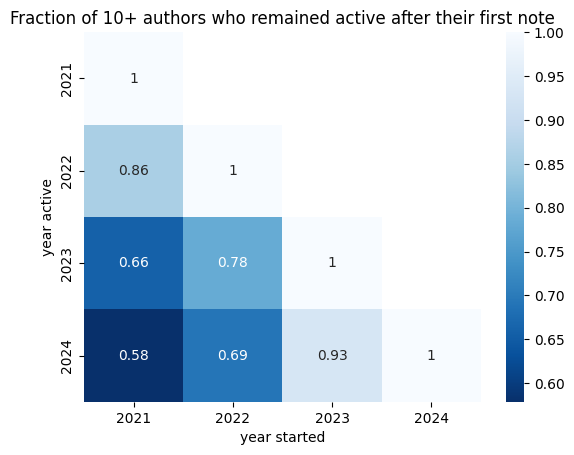

In [21]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}
# least number of notes the author have written
k = 10
df_k = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(k-1)]
for year in range(2021, 2025):
    distinct_authors_dict[year] = df_k[df_k['createdAtYear'] == year]['noteAuthorParticipantId'].unique()
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])

# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title(f'Fraction of {k}+ authors who remained active after their first note')


And for authors who had at least one note rated helpful

Text(0.5, 1.0, 'Fraction of helpful authors who remained active after their first note')

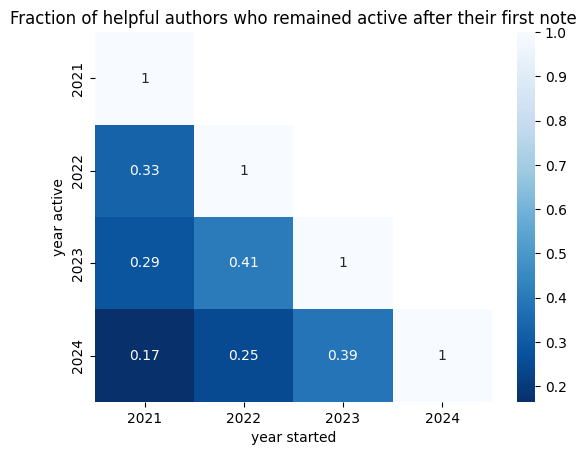

In [29]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
helpful_authors = rated[rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
                    ['noteAuthorParticipantId'].unique()
# make a dict of the list of unique authors each year
distinct_authors_dict = {}
# create a year column
rated['Year'] = pd.to_datetime(rated['createdAtMillis'], unit='ms').dt.year
for year in range(2021, 2025): 
    year_authors = rated[rated['Year'] == year]['noteAuthorParticipantId'].unique()
    # find intersection of year authors with helpful ones. Since a helpful author could have started
    # with unhelpful notes
    distinct_authors_dict[year] = np.intersect1d(year_authors, helpful_authors)
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])

# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title(f'Fraction of helpful authors who remained active after their first note')


In [28]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'firstTag', 'secondTag',
       'classification', 'createdAtMillis', 'numRatings', 'noteTopic',
       'topicNoteConfident', 'noteAuthorParticipantId', 'tweetId',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'language'],
      dtype='object')

### notes authored per user per month or quarter. 
How long does the typical author have consecutive months > 0 on this measure?

In [5]:
col = ['noteAuthorParticipantId']
df_author = notes.groupby(col)
month_diff = df_author['createdAtMonth'].diff()
year_diff = df_author['createdAtYear'].diff()
nonconsecutive = ~((year_diff.eq(0) & month_diff.eq(1)) | (year_diff.eq(1) & month_diff.eq(-11)))
max_consecutive = notes.groupby([*col, nonconsecutive.cumsum()]).size().droplevel(-1).groupby(col).max().reset_index(name='counts')

In [6]:
max_consecutive.describe()

,counts
count,213216.000000
mean,1.557529
std,0.795287
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


In [23]:
# let's do the same for quarters
col = ['noteAuthorParticipantId']
notes['quarter'] = pd.PeriodIndex(notes.createdAt, freq='Q')
df_author = notes.groupby(col)

diff = df_author['quarter'].diff().apply(lambda x: x if pd.isnull(x) else x.n)
nonconsecutive = ~(diff.eq(1))
max_consecutive_q = notes.groupby([*col, nonconsecutive.cumsum()]).size().droplevel(-1).groupby(col).max().reset_index(name='counts')

In [24]:
max_consecutive_q.describe()

,counts
count,213216.000000
mean,1.480138
std,0.657977
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


array([[<Axes: title={'center': 'counts'}>]], dtype=object)

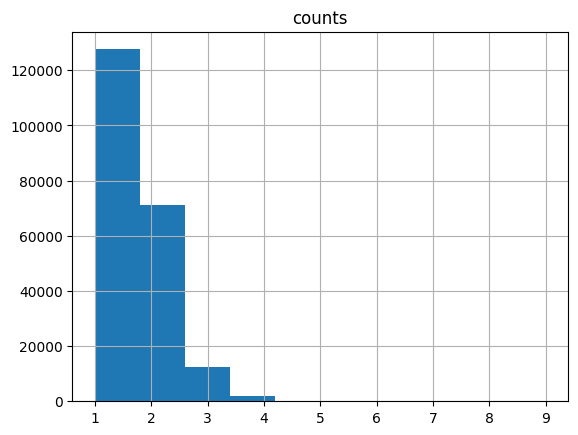

In [25]:
max_consecutive_q.hist()

Since we have used the date quarters, it does not show very accurate figures. E.g. Someone who has written only one note is counted in active in 1 quarter. Plus, if you write something in march and another in april, you were active for two quarters. Maybe having rolling quarters would be a better approach if we need it.

### Q4. What is distribution of authoring among participants? Can we identify superusers who author most notes? Do the questions 1 - 3, above, look different if we restrict our analyses superusers?

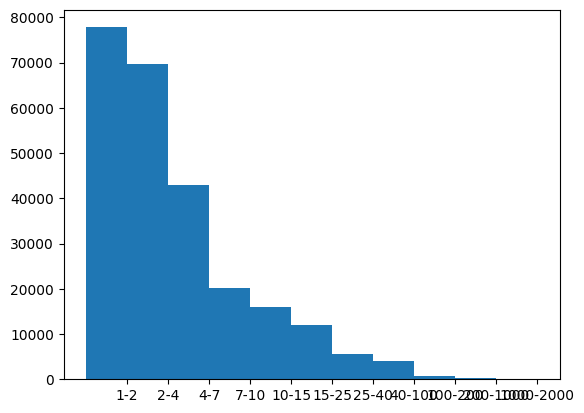

In [4]:
# let's see the distribution of notes per author first
count_notes_per_author = notes.groupby('noteAuthorParticipantId')['noteId'].count().to_list()
bins = [1, 2, 4, 7, 10, 15, 25, 40, 100, 200, 1000, 2000]
hist, bin_edges = np.histogram(count_notes_per_author,bins) # make the histogram

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{}-{}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

plt.show()

There are some users who writes a lot! 


In [5]:
pd.DataFrame(count_notes_per_author).describe()

,0
count,249328.000000
mean,7.294524
std,107.484225
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,49377.000000


Someone has written more than 49000 notes! Could they be bots? 
Let's check some of their notes!

In [19]:
count_notes = notes.groupby('noteAuthorParticipantId')['noteId'].count().reset_index()
count_notes.sort_values(by='noteId', ascending=False, inplace=True)

In [4]:
count_notes.reset_index().loc[0, 'noteAuthorParticipantId']

'111F4A03D7F1923DCEC73DD8595474B5BFA1C4E88D3224D24348DD08B82C38D9'

In [21]:
# one author cannot be linked to any account
missing_author = count_notes.reset_index().loc[1, 'noteAuthorParticipantId']

In [5]:
star_author = count_notes.reset_index().loc[0,'noteAuthorParticipantId']
notes[notes['noteAuthorParticipantId'] == star_author]['summary'].sample(20)

1710372    ⚠️ Deceptive site ahead    Potential threats o...
1713658    This account appears to be impersonating @Onyx...
1718101    ⚠️ Deceptive site ahead    Potential threats o...
1698859    This account is impersonating @MustStopMurad. ...
1707395    ⚠️ Deceptive site ahead    Potential threats o...
1680045    This account is impersonating @BabyDogeCoin. L...
1685121    This account is impersonating @MustStopMurad. ...
1672633    This account is impersonating @pacmoon_. Lette...
1716290    ⚠️ Deceptive site ahead    Potential threats o...
1687665    ⚠️ Deceptive site ahead    Potential threats o...
1679395    ⚠️ Deceptive site ahead    Potential threats o...
1712482    ⚠️ Deceptive site ahead    Potential threats o...
1692246    This account is impersonating @NonPlayableCoin...
1675292    ⚠️ Deceptive site ahead ⚠️    Potential threat...
1678867    ⚠️ Deceptive site ahead    Potential threats o...
1683715    ⚠️ Deceptive site ahead    Potential threats o...
1713844    This account 

In [ ]:
## save Id and count notes for authors with more than 1000 notes
# df = count_notes[count_notes['noteId'] > 1000]
# df.rename(columns={'noteId': 'count'}, inplace=True)
# df.to_csv('star_authors.csv')

/tmp/ipykernel_4840/2548948843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'noteId': 'count'}, inplace=True)


In [ ]:
# find top five super authors
super_authors = count_notes.reset_index().loc[0:5,'noteAuthorParticipantId'].to_list()

df = pd.DataFrame(columns=['noteId', 'tweetId', 'noteAuthorParticipantId', 'summary', 'createdAt'])
# find and save their notes in a csv
for author in super_authors:
    df = pd.concat([df, notes[notes['noteAuthorParticipantId'] == author]], axis=0, join='inner')
# df.to_csv('notes_by_top_5_authors.csv')

/tmp/ipykernel_8147/829358889.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, notes[notes['noteAuthorParticipantId'] == author]], axis=0, join='inner')


In [3]:
notes.columns

Index(['noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'tweetId',
       'classification', 'believable', 'harmful', 'validationDifficulty',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'createdAt', 'createdAtYear', 'createdAtMonth'],
      dtype='object')

Some similar notes. They may be rated helpful though. Let's check it!

In [11]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')

In [61]:
rated[rated['noteAuthorParticipantId'] == star_author]['finalRatingStatus'].describe()

count                        1197
unique                          1
top       CURRENTLY_RATED_HELPFUL
freq                         1197
Name: finalRatingStatus, dtype: object

About half of them are rated and all of them are rated helpful! Impressive!

In [26]:
#TODO 
# identify superusers and run analysis on them, instead of the whole authors
# how to define a superusers?


### Q. Rolling share of new vs older authors (6 months rolling window)

In [10]:
 # what fraction of notes were written by new (less than 3 months in CN) users

 #create a df from authors and when they joined
authors = notes.groupby('noteAuthorParticipantId')[['createdAt', 'createdAtYear', 'createdAtMonth']]\
    .first().reset_index()
# sort by date and make it the index, so the search would be easier
authors.sort_values(by='createdAt', inplace=True)
authors.set_index('createdAt', inplace=True)

In [ ]:
share_new_authors = dict()
# start from Jan 23
df = notes[(notes.createdAt >= pd.Timestamp(2023, 1, 1)) &
           (notes.createdAt < pd.Timestamp(2025, 1, 1))]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])['noteAuthorParticipantId']
for (year, month), notes_month in df_monthly:
    # count notes by new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 4 months
    authors_new = authors.loc[(current_month - pd.DateOffset(months=4)): (current_month + pd.DateOffset(months=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author, count in notes_month.value_counts().items():
        if author in authors_new:
            if_new += count

    share_new_authors[(year, month)] = if_new / len(notes_month)

In [20]:
#save share_new_authors
with open('share_new_authors_4.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)


In [14]:
# load share_new_authors
with open('share_new_authors_4.pkl', 'rb') as f:
    share_new_authors = pickle.load(f)

[]

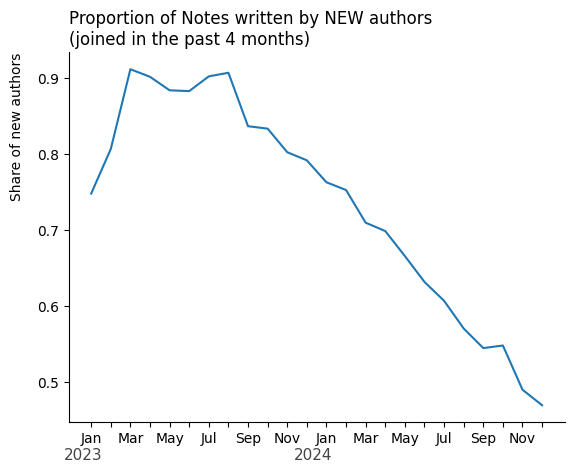

In [28]:
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
# add years
for idx, year in enumerate(range(2023,2025)):
    ax.text(idx*.465 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.yaxis.set_label_coords(-.09, .8)
ax.set_title(f'Proportion of Notes written by NEW authors\n(joined in the past 4 months)',
             loc='left',
             x=0, y=1)
ax.spines[['right', 'top']].set_visible(False)
plt.plot()

Another way of showing the above plot

[]

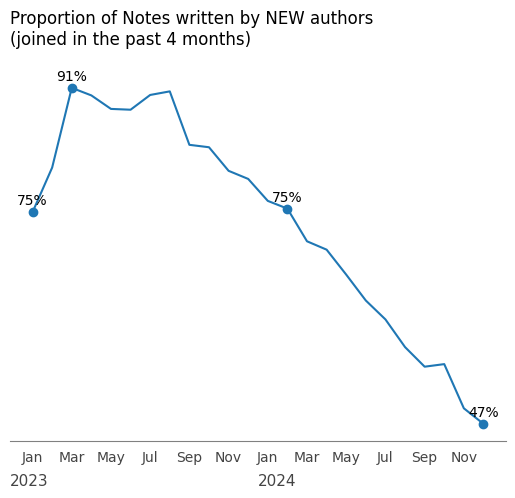

In [34]:
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
ax.tick_params(axis='both', colors="#444444", labelleft=False, left=False, bottom=False)
ax.spines[['bottom']].set_color("grey")

# add years
for idx, year in enumerate(range(2023,2025)):
    ax.text(idx*.5, -.12, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_title(f'Proportion of Notes written by NEW authors\n(joined in the past 4 months)',
             loc='left',
             x=0, y=1.05)
ax.spines[['right', 'top', 'left']].set_visible(False)

# mark start and end proportions for 2024
for month in [14,24]:
    x = month-1
    y = share_new_authors[2024, month-12]
    ax.plot(x,
            y,
            marker='o',
            color='tab:blue')
    ax.text(x,
            y+.01,
            f"{y*100:.0f}%",
            ha='center')
# mark start and pick proportions for 2023
for month in [1,3]:
    x = month-1
    y = share_new_authors[2023, month]
    ax.plot(x,
            y,
            marker='o',
            color='tab:blue')
    ax.text(x,
            y+.01,
            f"{y*100:.0f}%",
            ha='center')
plt.plot()

In [32]:
share_new_authors

{(np.int32(2023), np.int32(1)): 0.7479546054367907,
 (np.int32(2023), np.int32(2)): 0.8067570076109152,
 (np.int32(2023), np.int32(3)): 0.9118804091266719,
 (np.int32(2023), np.int32(4)): 0.9019101352729251,
 (np.int32(2023), np.int32(5)): 0.8841028081865778,
 (np.int32(2023), np.int32(6)): 0.8830442081701175,
 (np.int32(2023), np.int32(7)): 0.9025008143027758,
 (np.int32(2023), np.int32(8)): 0.9072286068270176,
 (np.int32(2023), np.int32(9)): 0.8367564425498935,
 (np.int32(2023), np.int32(10)): 0.8335685871936354,
 (np.int32(2023), np.int32(11)): 0.8024781223208942,
 (np.int32(2023), np.int32(12)): 0.7917905373878498,
 (np.int32(2024), np.int32(1)): 0.7628335864612714,
 (np.int32(2024), np.int32(2)): 0.7526399812528377,
 (np.int32(2024), np.int32(3)): 0.7095626191835396,
 (np.int32(2024), np.int32(4)): 0.6985260656317945,
 (np.int32(2024), np.int32(5)): 0.6656079645200037,
 (np.int32(2024), np.int32(6)): 0.6314701530906687,
 (np.int32(2024), np.int32(7)): 0.6065747418644708,
 (np.int3

In [8]:
# Redo analysis with 6 months
share_new_authors_6 = dict()
# start from Jan 2024
df = notes[notes.createdAt >= pd.Timestamp(2024, 1, 1)]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])['noteAuthorParticipantId']
for (year, month), notes_month in df_monthly:
    # count notes by new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 6 months
    authors_new = authors.loc[(current_month - pd.DateOffset(months=6)): (current_month + pd.DateOffset(months=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author, count in notes_month.value_counts().items():
        if author in authors_new:
            if_new += count

    share_new_authors_6[(year, month)] = if_new / len(notes_month)
#save share_new_authors
with open('share_new_authors_6.pkl', 'wb') as f:
    pickle.dump(share_new_authors_6, f)

[]

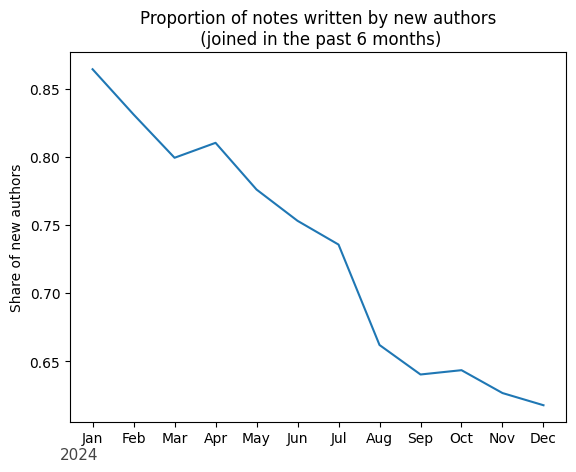

In [11]:
# load share_new_authors
with open('share_new_authors_6.pkl', 'rb') as f:
    share_new_authors_6 = pickle.load(f)
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors_6)), y=share_new_authors_6.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors_6.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
for idx, year in enumerate(range(2024,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of notes written by new authors\n (joined in the past 6 months)')
plt.plot()

### Cumulative note authors vs 10+ note authors over time

In [16]:
# cumulative number of authors
cum_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
cum_authors_monthly['cum_authors'] = cum_authors_monthly['noteId'].cumsum()
cum_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [17]:
# cumulative number of authors with more than 10 notes
df_10 = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(9)]
cum_authors_monthly_10 = df_10.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
cum_authors_monthly_10['cum_authors'] = cum_authors_monthly_10['noteId'].cumsum()
cum_authors_monthly_10.rename(columns={'noteId': 'count'}, inplace=True)

[]

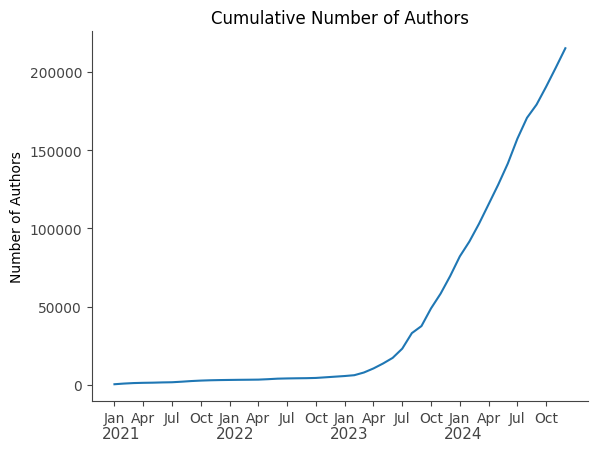

In [18]:
# first just show the growth of authors
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_ylabel('Number of Authors')
# ax.yaxis.set_label_coords(-.14, .85)
ax.set_title('Cumulative Number of Authors')
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#444444')
ax.tick_params(axis='both', colors='#444444')
plt.plot()

[]

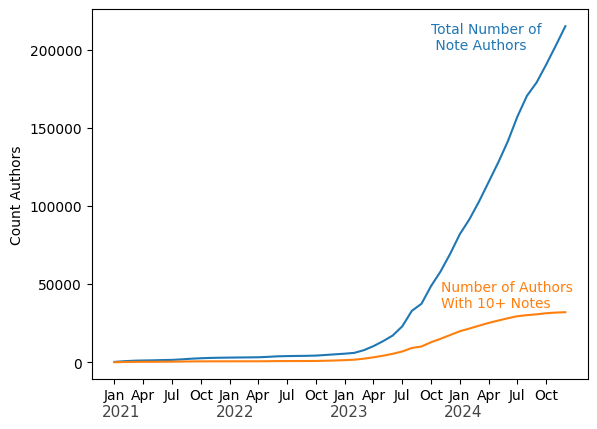

In [61]:
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'])
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10)), y=cum_authors_monthly_10['cum_authors'])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.text(33, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax.text(34, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax.set_ylabel('Count Authors')
# ax.set_title('Proportion of notes written by new authors\n (joined in the past 6 months)')
plt.plot()

Proportion of these two lines is not obvious. Let's make it in numbers.

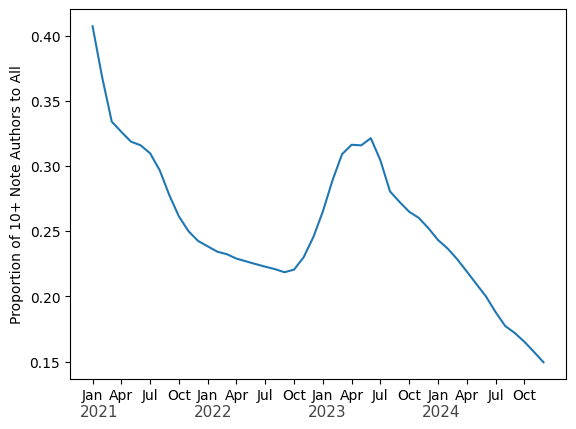

In [18]:
proportion_10_plus = cum_authors_monthly_10['cum_authors'] / cum_authors_monthly['cum_authors']
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=proportion_10_plus)
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_ylabel('Proportion of 10+ Note Authors to All')
plt.show()

[]

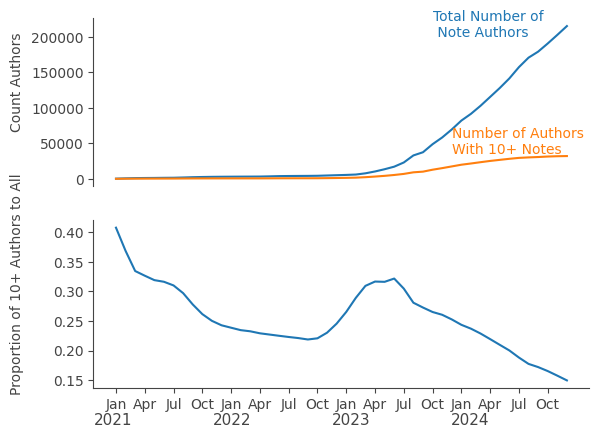

In [ ]:
# merge two plots
fig, (ax1, ax2) = plt.subplots(2,1)



sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'], ax=ax1)
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10)), y=cum_authors_monthly_10['cum_authors'], ax=ax1)



ax1.text(33, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax1.text(35, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax1.set_ylabel('Count Authors', color='#444')
ax1.yaxis.set_label_coords(-.14, .62)

proportion_10_plus = cum_authors_monthly_10['cum_authors'] / cum_authors_monthly['cum_authors']
sns.lineplot(x=range(len(cum_authors_monthly)), y=proportion_10_plus, ax=ax[1])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax2.set_xticks(x_locs[::3])
ax2.set_xticklabels(x_labels[::3])
ax2.set_ylabel('Proportion of 10+ Authors to All', color='#444')
ax2.yaxis.set_label_coords(-.14, .62)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax2.text(idx*.24 , -.22, str(year), size=11, color='#444', transform=ax2.transAxes)
# beautify the plot
ax1.spines[['top', 'right', 'bottom']].set_visible(False)
ax1.spines[['left']].set_color('#444444')
ax1.tick_params(axis='both', colors='#444444', labelbottom=False, bottom=False)
ax2.spines[['top', 'right']].set_visible(False)
ax2.spines[['left', 'bottom']].set_color('#444444')
ax2.tick_params(axis='both', colors='#444444')
plt.plot()

[]

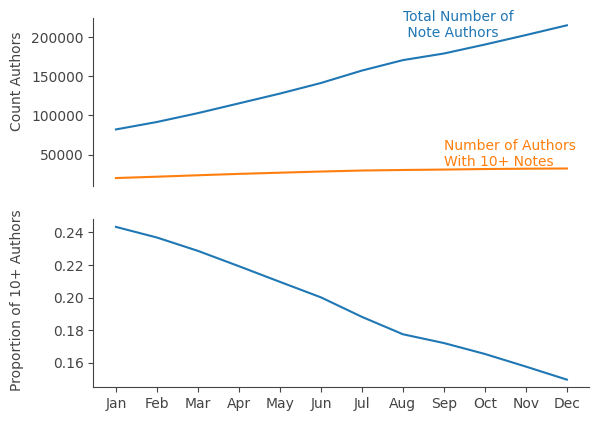

In [84]:
# above plot, only for 2024
# merge two plots
fig, (ax1, ax2) = plt.subplots(2,1)

cum_authors_monthly_24 = cum_authors_monthly[cum_authors_monthly['createdAtYear'] == 2024]
cum_authors_monthly_10_24 = cum_authors_monthly_10[cum_authors_monthly_10['createdAtYear'] == 2024]

sns.lineplot(x=range(len(cum_authors_monthly_24)), y=cum_authors_monthly_24['cum_authors'], ax=ax1)
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10_24)), y=cum_authors_monthly_10_24['cum_authors'], ax=ax1)



ax1.text(7, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax1.text(8, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax1.set_ylabel('Count Authors', color='#444')
ax1.yaxis.set_label_coords(-.14, .62)

proportion_10_plus = cum_authors_monthly_10_24['cum_authors'] / cum_authors_monthly_24['cum_authors']
sns.lineplot(x=range(len(cum_authors_monthly_24)), y=proportion_10_plus, ax=ax2)
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly_24['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# # ax.get_xaxis().set_visible(False)
ax2.set_xticks(x_locs)
ax2.set_xticklabels(x_labels)
ax2.set_ylabel('Proportion of 10+ Authors', color='#444')
ax2.yaxis.set_label_coords(-.14, .52)
# add years
# for idx, year in enumerate(range(2021,2025)):
#     ax2.text(idx*.29 +.05, -.11, str(year), size=11, color='#444', transform=ax.transAxes)
# beautify the plot
ax1.spines[['top', 'right', 'bottom']].set_visible(False)
ax1.spines[['left']].set_color('#444444')
ax1.tick_params(axis='both', colors='#444444', labelbottom=False, bottom=False)
ax2.spines[['top', 'right']].set_visible(False)
ax2.spines[['left', 'bottom']].set_color('#444444')
ax2.tick_params(axis='both', colors='#444444')
plt.plot()

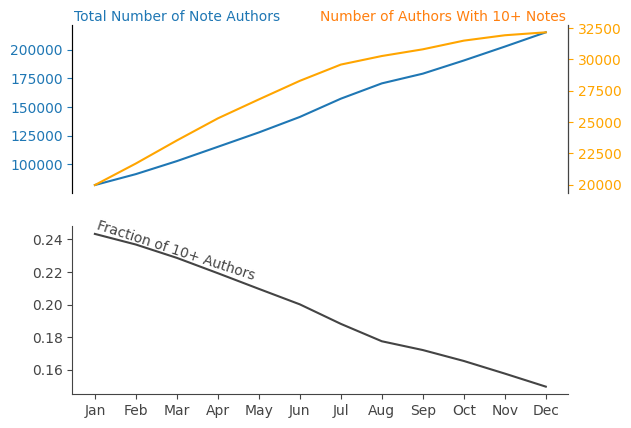

In [68]:
# above plot, only for 2024
# merge two plots
# dual y axis for the first plot
fig, ax = plt.subplots(2,1)

cum_authors_monthly_24 = cum_authors_monthly[cum_authors_monthly['createdAtYear'] == 2024]
cum_authors_monthly_10_24 = cum_authors_monthly_10[cum_authors_monthly_10['createdAtYear'] == 2024]

sns.lineplot(x=range(len(cum_authors_monthly_24)), y=cum_authors_monthly_24['cum_authors'], ax=ax[0])
# add authors with more than 10 notes
ax1 = ax[0].twinx()
sns.lineplot(x=range(len(cum_authors_monthly_10_24)), 
             y=cum_authors_monthly_10_24['cum_authors'],
            color='orange', ax=ax1)



ax[0].text(-.5, 225000, f'Total Number of Note Authors', color='tab:blue', ha='left')
ax[0].text(5.5, 225000, f'Number of Authors With 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
# ax[0].set_ylabel('Total Number of Authors', color='#444')
# ax[0].yaxis.set_label_coords(-.14, .62)

proportion_10_plus = cum_authors_monthly_10_24['cum_authors'] / cum_authors_monthly_24['cum_authors']
sns.lineplot(x=range(len(cum_authors_monthly_24)), 
             y=proportion_10_plus, 
             color='#444444', ax=ax[1])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly_24['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# # ax.get_xaxis().set_visible(False)
ax[1].set_xticks(x_locs)
ax[1].set_xticklabels(x_labels)
# ax[1].set_ylabel('Proportion of 10+ Authors to All', color='#444')
# ax[1].yaxis.set_label_coords(-.14, .52)
ax[1].text(0, .215, f'Fraction of 10+ Authors', color='#444444', rotation=-18)
# add years
# for idx, year in enumerate(range(2021,2025)):
#     ax[1].text(idx*.29 +.05, -.11, str(year), size=11, color='#444', transform=ax.transAxes)
# beautify the plot
ax[0].spines[['top', 'bottom']].set_visible(False)
ax1.spines[['top', 'bottom']].set_visible(False)
axyl = ax1.get_ylabel()
ax1.set_ylabel(axyl).set_visible(False)
axyl = ax[0].get_ylabel()
ax[0].set_ylabel(axyl).set_visible(False)
axyl = ax[1].get_ylabel()
ax[1].set_ylabel(axyl).set_visible(False)
ax[0].spines[['left']].set_color('#444444')
ax[0].tick_params(axis='both', colors='tab:blue', labelbottom=False, bottom=False)
ax1.tick_params(axis='both', colors='orange')
ax1.spines[['right']].set_color('#444444')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].spines[['left', 'bottom']].set_color('#444444')
ax[1].tick_params(axis='both', colors='#444444')
plt.show()

### Calculate “lifetime” of authors: gap in time between first and most recent note
-AND number of notes divided by lifetime

In [56]:
# Sort the DataFrame by author and time
df_sorted = notes.sort_values(by=['noteAuthorParticipantId', 'createdAt'])

# Group by 'author' and calculate the time difference between the first and last note
time_diff = df_sorted.groupby('noteAuthorParticipantId').agg(
    first_note_time=('createdAt', 'first'),
    last_note_time=('createdAt', 'last'),
    num_notes=('noteId', 'size')  # Count the number of notes
)

# Calculate the time difference between the first and last note
time_diff['time_diff'] = time_diff['last_note_time'] - time_diff['first_note_time']
time_diff['time_diff'] = time_diff['time_diff'].dt.days / 30  # get lifetime in months

In [57]:
# lifetime distribution
time_diff['time_diff'].describe()

count    213216.000000
mean          3.660944
std           5.209719
min           0.000000
25%           0.000000
50%           1.200000
75%           5.800000
max          47.100000
Name: time_diff, dtype: float64

In [59]:
# if we ignore authors with only one note:
time_diff[time_diff['time_diff'] > 0]['time_diff'].describe()

count    138834.000000
mean          5.622339
std           5.536675
min           0.033333
25%           1.366667
50%           4.100000
75%           8.366667
max          47.100000
Name: time_diff, dtype: float64

In [62]:
# number of notes divided by lifetime 
time_diff_2_plus = time_diff[time_diff['time_diff'] > 0]
time_diff_2_plus['activity'] = time_diff_2_plus['num_notes'] / time_diff_2_plus['time_diff']
time_diff_2_plus['activity'].describe()

/tmp/ipykernel_3408/3612877749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_diff_2_plus['activity'] = time_diff_2_plus['num_notes'] / time_diff_2_plus['time_diff']


count    138834.000000
mean          5.269257
std          18.124019
min           0.044543
25%           0.745342
50%           1.530612
75%           3.719008
max        3802.780749
Name: activity, dtype: float64

### Active users; share of new authors
check if they joined in the past 4 months.
First a monthly view


In [7]:
 #create a df from authors and when they joined
authors = notes.groupby('noteAuthorParticipantId')[['createdAt', 'createdAtYear', 'createdAtMonth']]\
    .first().reset_index()
# sort by date and make it the index, so the search would be easier
authors.sort_values(by='createdAt', inplace=True)
authors.set_index('createdAt', inplace=True)

In [8]:
share_new_authors = dict()
# start from Jan 2024
df = notes[notes.createdAt >= pd.Timestamp(2024, 1, 1)]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])\
    .agg({'noteAuthorParticipantId': 'unique'})
for (year, month), authors_month in df_monthly.iterrows():
    # count new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 4 months; including current month
    authors_new = authors.loc[(current_month - pd.DateOffset(months=4)): (current_month + pd.DateOffset(months=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author in authors_month.values[0]:
        if author in authors_new:
            if_new += 1

    share_new_authors[(year, month)] = if_new / len(authors_month.values[0])
#save share_new_authors
with open('share_new_authors_authors.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)

KeyboardInterrupt: 

[]

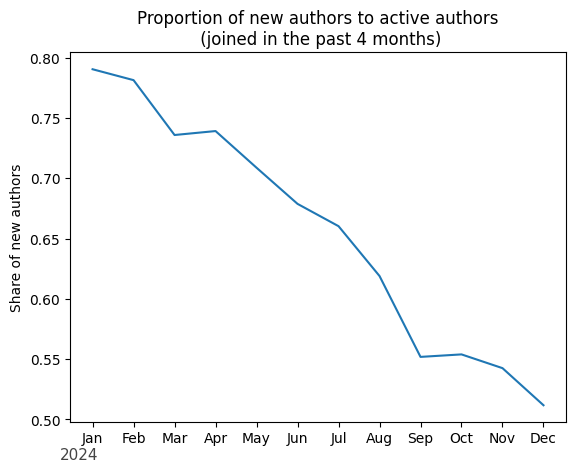

In [ ]:
# load share_new_authors
with open('share_new_authors_authors.pkl', 'rb') as f:
    share_new_authors_month = pickle.load(f)

ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors_month)), y=share_new_authors_month.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors_month.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
for idx, year in enumerate(range(2024,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of new authors to active authors\n (joined in the past 4 months)')
plt.plot()

A daily view

In [ ]:
share_new_authors = dict()
# start from Jan 2024
df = notes[notes.createdAt >= pd.Timestamp(2024, 1, 1)]
df['createdAtDay'] = df['createdAt'].dt.day
df_daily = df.groupby(['createdAtYear', 'createdAtMonth','createdAtDay'])\
    .agg({'noteAuthorParticipantId': 'unique'})
for (year, month, day), authors_day in df_daily.iterrows():
    # count new authors
    if_new = 0
    current_date = pd.Timestamp(year, month, day)
    # create a list of authors joined in the past 4 months; including current month
    authors_new = authors.loc[(current_date - pd.DateOffset(months=4)): (current_date + pd.DateOffset(days=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author in authors_day.values[0]:
        if author in authors_new:
            if_new += 1

    share_new_authors[(year, month, day)] = if_new / len(authors_day.values[0])
#save share_new_authors
with open('share_new_authors_authors_daily.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)

/tmp/ipykernel_2971/644001690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdAtDay'] = df['createdAt'].dt.day


[]

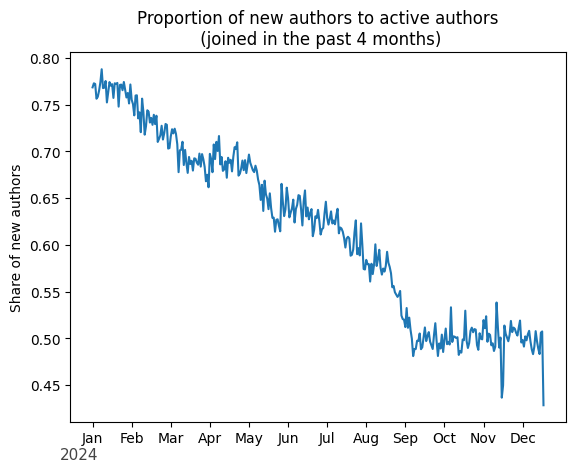

In [ ]:
# load share_new_authors
with open('share_new_authors_authors_daily.pkl', 'rb') as f:
    share_new_authors = pickle.load(f)

ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for month in range(13)]
x_locs = [(i-1)*30 for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
for idx, year in enumerate(range(2024,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of new authors to active authors\n (joined in the past 4 months)')
plt.plot()

In [3]:
df = pd.read_parquet('./scored_notes.parquet', engine='auto')

In [4]:
df.columns

Index(['noteId', 'coreNoteIntercept', 'coreNoteFactor1', 'finalRatingStatus',
       'firstTag', 'secondTag', 'coreActiveRules', 'activeFilterTags',
       'classification', 'createdAtMillis', 'coreRatingStatus',
       'metaScorerActiveRules', 'decidedBy', 'expansionNoteIntercept',
       'expansionNoteFactor1', 'expansionRatingStatus',
       'coverageNoteIntercept', 'coverageNoteFactor1', 'coverageRatingStatus',
       'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'numRatings', 'timestampMillisOfCurrentStatus',
       'expansionPlusNoteIntercept', 'expansionPlusNoteFactor1',
       'expansionPlusRatingStatus', 'topicNoteIntercept', 'topicNoteFactor1',
       'topicRatingStatus', 'noteTopic', 'topicNoteConfi

In [3]:
df[df['numRatings'] >=5].loc[:, ['decidedBy','finalRatingStatus', 'numRatings']]

,decidedBy,finalRatingStatus,numRatings
34,ScoringDriftGuard (v1.0),CURRENTLY_RATED_HELPFUL,5
141,ScoringDriftGuard (v1.0),CURRENTLY_RATED_HELPFUL,6
168,CoreModel (v1.1),NEEDS_MORE_RATINGS,10
181,CoreModel (v1.1),NEEDS_MORE_RATINGS,8
183,CoreModel (v1.1),NEEDS_MORE_RATINGS,14
...,...,...,...
1674889,CoreModel (v1.1),NEEDS_MORE_RATINGS,33
1674905,CoreModel (v1.1),NEEDS_MORE_RATINGS,15
1674913,CoreModel (v1.1),NEEDS_MORE_RATINGS,12
1674918,CoreModel (v1.1),NEEDS_MORE_RATINGS,8


In [5]:
# sample from rated and not rated notes
df_sample_rated = df\
    [(df['finalRatingStatus'] != 'NEEDS_MORE_RATINGS')]\
    .sample(n=100, random_state=2025)
df_sample_not_rated = df\
    [(df['finalRatingStatus'] == 'NEEDS_MORE_RATINGS')\
     & (df['numRatings'] >=5)]\
    .sample(n=100, random_state=2025)

df_sample = pd.concat([df_sample_rated, df_sample_not_rated])

In [6]:
df_sample_rated[df_sample_rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
[['coreNoteIntercept', 'coreNoteFactor1', 'finalRatingStatus',
       'coreRatingStatus','decidedBy', 'expansionNoteIntercept',
       'expansionNoteFactor1', 'expansionRatingStatus',
       'coverageNoteIntercept', 'coverageNoteFactor1', 'coverageRatingStatus',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus', 'expansionPlusNoteIntercept', 'expansionPlusNoteFactor1',
       'expansionPlusRatingStatus',
       'numRatings']]

,coreNoteIntercept,coreNoteFactor1,finalRatingStatus,coreRatingStatus,decidedBy,expansionNoteIntercept,expansionNoteFactor1,expansionRatingStatus,coverageNoteIntercept,coverageNoteFactor1,coverageRatingStatus,groupNoteIntercept,groupNoteFactor1,groupRatingStatus,expansionPlusNoteIntercept,expansionPlusNoteFactor1,expansionPlusRatingStatus,numRatings
1321331,NaN,NaN,CURRENTLY_RATED_HELPFUL,None,ExpansionModel (v1.1),0.443757,0.202811,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,None,0.446070,0.205501,CURRENTLY_RATED_HELPFUL,13
902008,0.368484,-0.395131,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS,ScoringDriftGuard (v1.0),0.364179,-0.390135,NEEDS_MORE_RATINGS,0.182059,0.410795,NEEDS_MORE_RATINGS,0.310934,-0.543632,NEEDS_MORE_RATINGS,0.367629,-0.393721,NEEDS_MORE_RATINGS,50
513828,0.431230,0.352343,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.425772,0.315994,CURRENTLY_RATED_HELPFUL,0.318437,-0.125798,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.430852,0.324722,CURRENTLY_RATED_HELPFUL,626
816106,0.186433,0.549042,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.183236,0.544482,FIRM_REJECT,0.174732,-0.230830,NEEDS_MORE_RATINGS,0.001111,0.593719,NEEDS_MORE_RATINGS,0.184812,0.546762,NEEDS_MORE_RATINGS,10
290845,0.460647,-0.161905,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.518125,-0.126731,CURRENTLY_RATED_HELPFUL,0.488126,0.160052,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.512706,-0.124412,CURRENTLY_RATED_HELPFUL,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305569,0.344612,0.451399,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS,ScoringDriftGuard (v1.0),0.341030,0.449668,NEEDS_MORE_RATINGS,0.173421,-0.510252,NEEDS_MORE_RATINGS,0.014909,0.744247,NEEDS_MORE_RATINGS,0.346564,0.459112,NEEDS_MORE_RATINGS,309
107681,0.471922,-0.025283,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.478391,-0.046072,FIRM_REJECT,0.470124,0.123129,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.484175,-0.051855,NEEDS_MORE_RATINGS,24
815055,0.554149,-0.139585,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.563915,-0.127527,FIRM_REJECT,0.404572,0.168978,CURRENTLY_RATED_HELPFUL,0.148299,-0.546363,NEEDS_MORE_RATINGS,0.562842,-0.124032,NEEDS_MORE_RATINGS,116
150036,0.549704,-0.077339,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.561324,-0.043618,CURRENTLY_RATED_HELPFUL,0.344951,0.226181,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.567578,-0.046032,CURRENTLY_RATED_HELPFUL,108


check scoring drift guard again

In [23]:
df_sample_rated.loc[1305569]

noteId                                                             1827026955767517586
coreNoteIntercept                                                             0.344612
coreNoteFactor1                                                               0.451399
finalRatingStatus                                              CURRENTLY_RATED_HELPFUL
firstTag                                                       helpfulImportantContext
secondTag                                                                 helpfulClear
coreActiveRules                                                      InitialNMR (v1.0)
activeFilterTags                                                                  None
classification                                   MISINFORMED_OR_POTENTIALLY_MISLEADING
createdAtMillis                                                        1724432145429.0
coreRatingStatus                                                    NEEDS_MORE_RATINGS
metaScorerActiveRules                MetaIn

In [ ]:
# drop unwanted columns
df_sample = df_sample[['coreNoteIntercept', 'coreNoteFactor1', 'finalRatingStatus',
       'coreRatingStatus','decidedBy', 'expansionNoteIntercept',
       'expansionNoteFactor1', 'expansionRatingStatus',
       'coverageNoteIntercept', 'coverageNoteFactor1', 'coverageRatingStatus',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'modelingGroup',
       'numRatings']]
df_sample

,coreNoteIntercept,coreNoteFactor1,finalRatingStatus,coreRatingStatus,decidedBy,expansionNoteIntercept,expansionNoteFactor1,expansionRatingStatus,coverageNoteIntercept,coverageNoteFactor1,coverageRatingStatus,groupNoteIntercept,groupNoteFactor1,groupRatingStatus,groupNoteInterceptMax,groupNoteInterceptMin,modelingGroup,numRatings
1321331,NaN,NaN,CURRENTLY_RATED_HELPFUL,None,ExpansionModel (v1.1),0.443757,0.202811,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,13
902008,0.368484,-0.395131,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS,ScoringDriftGuard (v1.0),0.364179,-0.390135,NEEDS_MORE_RATINGS,0.182059,0.410795,NEEDS_MORE_RATINGS,0.310934,-0.543632,NEEDS_MORE_RATINGS,NaN,NaN,6.0,50
513828,0.431230,0.352343,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.425772,0.315994,CURRENTLY_RATED_HELPFUL,0.318437,-0.125798,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,NaN,626
832940,-0.214541,-0.210961,CURRENTLY_RATED_NOT_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),-0.204186,-0.250878,FIRM_REJECT,-0.453942,0.600861,NEEDS_MORE_RATINGS,NaN,NaN,None,NaN,NaN,NaN,6
816106,0.186433,0.549042,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.183236,0.544482,FIRM_REJECT,0.174732,-0.230830,NEEDS_MORE_RATINGS,0.001111,0.593719,NEEDS_MORE_RATINGS,NaN,NaN,14.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584125,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),0.408756,-0.082016,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,6
205405,0.331449,-0.016088,NEEDS_MORE_RATINGS,FIRM_REJECT,CoreModel (v1.1),0.307252,-0.064598,FIRM_REJECT,0.000096,0.210958,NEEDS_MORE_RATINGS,0.228290,-0.049754,CURRENTLY_RATED_HELPFUL,NaN,NaN,14.0,71
1095209,0.077417,-0.839710,NEEDS_MORE_RATINGS,FIRM_REJECT,CoreModel (v1.1),0.063088,-0.840747,FIRM_REJECT,-0.243690,0.699560,NEEDS_MORE_RATINGS,0.130991,-0.817084,NEEDS_MORE_RATINGS,NaN,NaN,3.0,62
75097,0.067604,0.632537,NEEDS_MORE_RATINGS,FIRM_REJECT,CoreModel (v1.1),0.048763,0.622989,FIRM_REJECT,-0.057299,-0.762147,NEEDS_MORE_RATINGS,NaN,NaN,None,NaN,NaN,NaN,11


In [14]:
df_sample[df_sample['multiGroupNumFinalRoundRatings'].notnull()]

,noteId,coreNoteIntercept,coreNoteFactor1,finalRatingStatus,firstTag,secondTag,coreActiveRules,activeFilterTags,classification,createdAtMillis,...,expansionPlusNumFinalRoundRatings,groupNumFinalRoundRatings,topicNumFinalRoundRatings,rescoringActiveRules,multiGroupNoteIntercept,multiGroupNoteFactor1,multiGroupRatingStatus,modelingMultiGroup,multiGroupActiveRules,multiGroupNumFinalRoundRatings
1356917,1833102736348369354,NaN,NaN,CURRENTLY_RATED_HELPFUL,helpfulGoodSources,helpfulClear,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.725881e+12,...,13.0,12.0,NaN,ALL_NOTES,0.226598,0.528370,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),12.0
300066,1712583143788560460,NaN,NaN,CURRENTLY_RATED_HELPFUL,helpfulGoodSources,helpfulClear,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.697147e+12,...,30.0,24.0,NaN,ALL_NOTES,0.470051,-0.176647,CURRENTLY_RATED_HELPFUL,1.0,"InitialNMR (v1.0),GeneralCRH (v1.0)",25.0
459742,1735777237159317950,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.702677e+12,...,25.0,23.0,NaN,ALL_NOTES,0.219462,0.606440,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),24.0
1352513,1832517150784848110,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.725741e+12,...,6.0,6.0,NaN,ALL_NOTES,0.139823,-0.441599,NEEDS_MORE_RATINGS,1.0,"InitialNMR (v1.0),FilterLowDiligence (v1.0)",6.0
501882,1741153647436657087,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.703958e+12,...,14.0,NaN,NaN,ALL_NOTES,0.151716,-0.724121,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),12.0
1537239,1853067239852826841,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.730641e+12,...,25.0,NaN,15.0,ALL_NOTES,-0.057151,-0.461219,NEEDS_MORE_RATINGS,1.0,"InitialNMR (v1.0),FilterLowDiligence (v1.0)",22.0
400265,1728115119823937646,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,None,1.700850e+12,...,24.0,NaN,NaN,ALL_NOTES,0.229809,0.499899,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),21.0


### Top X% of authors wrote Y% of notes in 2024

I just limited the data to 2024. So if someone had written loads of notes in other years, but only 1 in 2024, just 1 was counted.

In [85]:
notes.columns

Index(['noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'tweetId',
       'classification', 'believable', 'harmful', 'validationDifficulty',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'createdAt', 'createdAtYear', 'createdAtMonth'],
      dtype='object')

In [51]:
notes_24 = notes[(notes.createdAt >= pd.Timestamp(2024, 1, 1)) &
                 (notes.createdAt < pd.Timestamp(2025, 1, 1))]
df = notes_24.groupby('noteAuthorParticipantId')['noteId']\
    .count().sort_values(ascending=False).reset_index()
df.rename(columns={'noteId': 'note_count'}, inplace=True)

You can fill X to find Y

In [63]:
# what percentage of authors you want to look at
X = 1
print(f"Top {X}% authors wrote\
 {df.loc[:round(len(df)*X/100)]['note_count'].sum() / len(notes_24) *100:.0f}% of notes")


Top 1% authors wrote 27% of notes


Text(0, 0.5, 'Proportion of Total Notes')

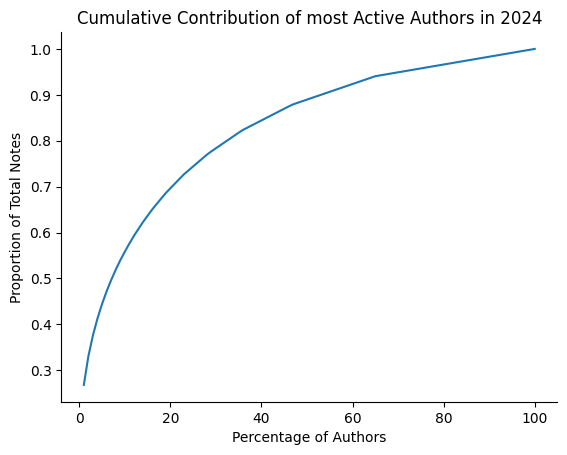

In [7]:
# make a plot of cumulative percentages
contributions = dict()
for author_percent in range(1,101):
    contributions[author_percent] = df.loc[:round(len(df)*author_percent/100)]['note_count'].sum()\
          / len(notes_24)

ax = sns.lineplot(x=range(1,101), y=contributions.values())
ax.set_title('Cumulative Contribution of most Active Authors in 2024')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Percentage of Authors')
ax.set_ylabel('Proportion of Total Notes')

Contributions for published notes:

Text(0, 0.5, 'Proportion of Total Helpful Notes')

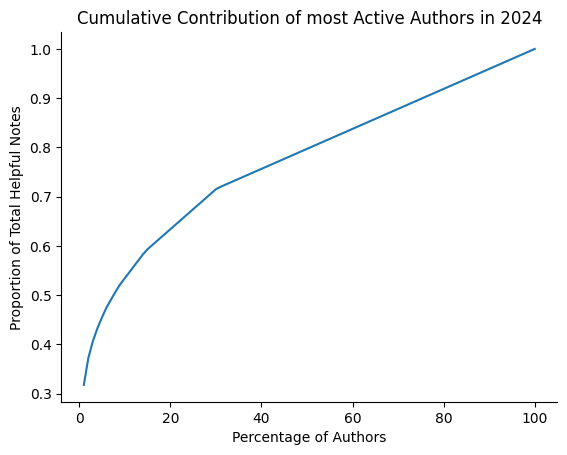

In [9]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]
rated_2024_pub = rated_2024[rated_2024['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']
df = rated_2024_pub.groupby('noteAuthorParticipantId')['noteId']\
    .count().sort_values(ascending=False).reset_index()
df.rename(columns={'noteId': 'note_count'}, inplace=True)

# make a plot of cumulative percentages
contributions = dict()
for author_percent in range(1,101):
    contributions[author_percent] = df.loc[:round(len(df)*author_percent/100)]['note_count'].sum()\
          / len(rated_2024_pub)

ax = sns.lineplot(x=range(1,101), y=contributions.values())
ax.set_title('Cumulative Contribution of most Active Authors in 2024')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Percentage of Authors')
ax.set_ylabel('Proportion of Total Helpful Notes')

In [15]:
# what percentage of authors you want to look at
X = 7.5
print(f"Top {X}% authors wrote\
 {df.loc[:round(len(df)*X/100)]['note_count'].sum() / len(rated_2024_pub) *100:.0f}% of Helpful notes")

Top 7.5% authors wrote 50% of Helpful notes


### fraction of helpful notes among all authors and active ones

In [49]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]
rated_2024_pub = rated_2024[rated_2024['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']

In [50]:
f'{len(rated_2024_pub) / len(rated_2024) * 100 :.0f}% of all notes were published in 2024.'

'8% of all notes were published in 2024.'

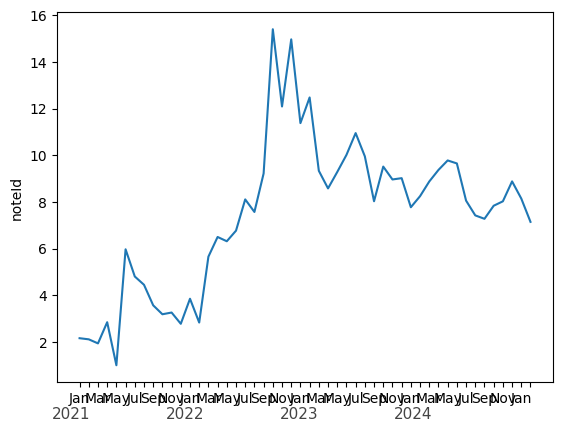

In [72]:
# and a plot of monthly view of share of helpful notes
rated_pub_monthly = rated[rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count().reset_index()

rated_monthly = rated.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count().reset_index()
fraction_helpful_monthly = rated_pub_monthly['noteId'] / rated_monthly['noteId'] * 100
ax = sns.lineplot(x= range(len(fraction_helpful_monthly)), y=fraction_helpful_monthly)
x_labels = [calendar.month_abbr[month] for month in rated_monthly['createdAtMonth'].astype(int)]
x_locs = [i for i in range(len(x_labels))]

ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

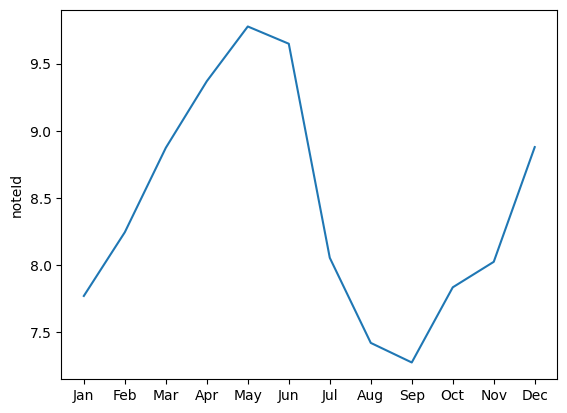

In [56]:
# and a plot of monthly view of share of helpful notes in 2024
rated_pub_monthly = rated_2024_pub\
    .groupby(['createdAtMonth'])['noteId'].count().reset_index()

rated_monthly = rated_2024.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count().reset_index()
fraction_helpful_monthly = rated_pub_monthly['noteId'] / rated_monthly['noteId'] * 100
ax = sns.lineplot(x= range(len(fraction_helpful_monthly)), y=fraction_helpful_monthly)
x_labels = [calendar.month_abbr[month] for month in rated_monthly['createdAtMonth'].astype(int)]
x_locs = [i for i in range(len(x_labels))]

ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
# for idx, year in enumerate(range(2021,2025)):
#     ax.text(idx*.23 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
plt.show()

[]

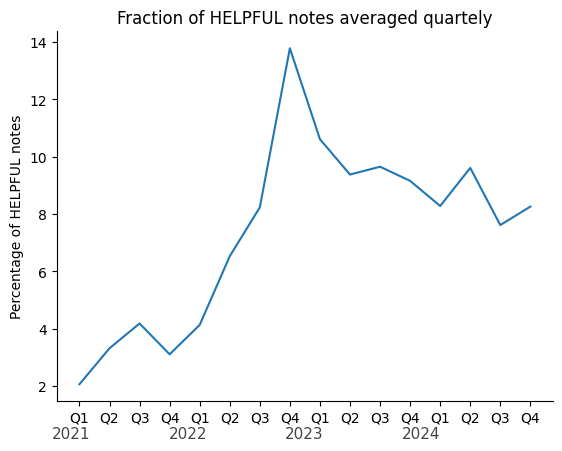

In [84]:
# aggregate data quarterly
rated = rated[rated.createdAt < pd.Timestamp(2025, 1, 1)]
rated_pub = rated[rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']
rated_pub_q = rated_pub\
    .groupby(pd.PeriodIndex(rated_pub.createdAt, freq='Q'))['noteId'].count().reset_index()

rated_q = rated.groupby(pd.PeriodIndex(rated.createdAt, freq='Q'))['noteId'].count().reset_index()
fraction_helpful_q = rated_pub_q['noteId'] / rated_q['noteId'] * 100

ax = sns.lineplot(x= range(len(fraction_helpful_q)), y=fraction_helpful_q)
x_labels = ['Q' + str(q.quarter) for q in rated_q.createdAt]
x_locs = [i for i in range(len(x_labels))]

ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)

for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.235 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_ylabel('Percentage of HELPFUL notes')
ax.set_title('Fraction of HELPFUL notes averaged quartely')
ax.spines[['top', 'right']].set_visible(False)
plt.plot()


In [93]:
# find top authors
df_without_rating = rated_2024.groupby(['noteAuthorParticipantId'])['noteId']\
    .count().sort_values(ascending=False).reset_index()
df_without_rating.rename(columns={'noteId': 'note_count'}, inplace=True)
top_1_percent = df_without_rating['noteAuthorParticipantId']\
    .loc[:round(len(df_without_rating)*1/100)].to_list()
count_notes_top_1 = df_without_rating['note_count'].sum()


In [94]:
# find fraction of published notes among top authors
df_with_rating = rated_2024.groupby(['noteAuthorParticipantId', 'finalRatingStatus'])['noteId']\
    .count().reset_index()
df_with_rating.rename(columns={'noteId': 'note_count'}, inplace=True)
count_published_top_1 = 0
for author in top_1_percent:
    count_published_top_1 += df_with_rating\
        [(df_with_rating['noteAuthorParticipantId'] == author) &
        (df_with_rating['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL')]\
            .sum().values[-1]

f'{count_published_top_1 / count_notes_top_1 * 100 :.0f}% of notes from top 1% authors were published in 2024.'

'3% of notes from top 1% authors were published in 2024.'

That's odd! We thought publishing was an incentive to write more notes. Now that I think about it, for automaticly generated notes, publishing would not matter that much. We need to look at people with high rate of note writing, but not automated ones!

In [95]:
#TODO
# look at middle authors, just remove the ones who have written thousands of notes!

### Q. What percentage of authors who have at least one note in the first half of 2024, have written a note on the second half? How were they in terms of helpfullness?

In [22]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]

In [4]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'createdAtMillis', 'createdAt',
       'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [38]:
first_half = rated_2024[rated_2024.createdAt <= pd.Timestamp(2024, 6, 30)]
second_half = rated_2024[rated_2024.createdAt > pd.Timestamp(2024, 6, 30)]
first_half_authors = first_half.groupby(['noteAuthorParticipantId', 'finalRatingStatus'])['noteId']\
    .count().reset_index()
second_half_authors = second_half.groupby(['noteAuthorParticipantId'])['noteId']\
    .count().reset_index()

In [34]:
first_half_authors_1_helpful = first_half_authors\
    [first_half_authors['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
    ['noteAuthorParticipantId'].unique()

first_half_authors_no_helpful = [author for author in first_half_authors['noteAuthorParticipantId'].unique()\
                                 if author not in first_half_authors_1_helpful]

In [52]:
first_half_authors_1_helpful_wrote_again = list(set(first_half_authors_1_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))
first_half_authors_not_helpful_wrote_again = list(set(first_half_authors_no_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))

In [ ]:
f'{len(first_half_authors_1_helpful_wrote_again) / len(first_half_authors_1_helpful)*100:.0f}%\
 of authors who have written at least 1 helpful note in the first half of 2024, wrote again in the\
 second half of 2024. Whereas \
{len(first_half_authors_not_helpful_wrote_again) / len(first_half_authors_no_helpful)*100:.0f}% \
of authors who had no helpful note, wrote in the 2nd half of 2024.'

'68% of authors who have written at list 1 helfpul note in the first half of 2024, wrote again in the second half of 2024. Whereas 49% of authors who had no helfpul note, wrote in the 2nd half of 2024.'

Now check the same fraction, for authors who have received at least one notification about their note becoming helpful.

In [47]:
first_half = rated_2024[rated_2024.createdAt <= pd.Timestamp(2024, 6, 30)]
second_half = rated_2024[rated_2024.createdAt > pd.Timestamp(2024, 6, 30)]
first_half_authors = first_half.groupby(['noteAuthorParticipantId', 'finalRatingStatus','firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus'])['noteId']\
    .count().reset_index()
second_half_authors = second_half.groupby(['noteAuthorParticipantId'])['noteId']\
    .count().reset_index()



In [52]:
first_half_authors_1_helpful = first_half_authors\
    [(first_half_authors['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL') |
     (first_half_authors['firstNonNMRStatus'] == 'CURRENTLY_RATED_HELPFUL') |
     (first_half_authors['mostRecentNonNMRStatus'] == 'CURRENTLY_RATED_HELPFUL')]\
    ['noteAuthorParticipantId'].unique()

first_half_authors_no_helpful = [author for author in first_half_authors['noteAuthorParticipantId'].unique()\
                                 if author not in first_half_authors_1_helpful]

In [61]:
first_half_authors_1_helpful_wrote_again = list(set(first_half_authors_1_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))
first_half_authors_not_helpful_wrote_again = list(set(first_half_authors_no_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))

In [ ]:
f'{len(first_half_authors_1_helpful_wrote_again) / len(first_half_authors_1_helpful)*100:.0f}%\
 of authors who have at at least once been helpful in the first half of 2024, wrote again in the\
 second half of 2024. Whereas \
{len(first_half_authors_not_helpful_wrote_again) / len(first_half_authors_no_helpful)*100:.0f}% \
of authors who had no helpful note, wrote in the 2nd half of 2024.'

'66% of authors who have written at list 1 helfpul note in the first half of 2024, wrote again in the second half of 2024. Whereas 42% of authors who had no helfpul note, wrote in the 2nd half of 2024.'

In [11]:
rated_2024[['decidedBy', 'finalRatingStatus']].value_counts()

decidedBy                        finalRatingStatus          
CoreModel (v1.1)                 NEEDS_MORE_RATINGS             741100
ExpansionPlusModel (v1.1)        NEEDS_MORE_RATINGS             101560
ExpansionModel (v1.1)            NEEDS_MORE_RATINGS              78089
CoreModel (v1.1)                 CURRENTLY_RATED_HELPFUL         59725
MultiGroupModel01 (v1.0)         NEEDS_MORE_RATINGS              30434
CoreModel (v1.1)                 CURRENTLY_RATED_NOT_HELPFUL     24303
ScoringDriftGuard (v1.0)         CURRENTLY_RATED_HELPFUL         17740
                                 CURRENTLY_RATED_NOT_HELPFUL      8507
ExpansionModel (v1.1)            CURRENTLY_RATED_HELPFUL          8407
ScoringDriftGuard (v1.0)         NEEDS_MORE_RATINGS               6957
NmrDueToMinStableCrhTime (v1.0)  NEEDS_MORE_RATINGS               6821
MultiGroupModel01 (v1.0)         CURRENTLY_RATED_HELPFUL          1943
ExpansionModel (v1.1)            CURRENTLY_RATED_NOT_HELPFUL      1574
GroupModel03 (v1

In [12]:
len(rated_2024)

1093680

### Q. One author (2nd most active author) cannot be linked to an account. Let's find out if their note were helpful

In [38]:
df = rated[rated['noteAuthorParticipantId'] == missing_author]\
    [['noteId', 'tweetId', 'noteAuthorParticipantId', 'summary', 'createdAt', 'finalRatingStatus']]
df.to_csv('missing_author.csv')
df['finalRatingStatus'].value_counts()

finalRatingStatus
NEEDS_MORE_RATINGS             8239
CURRENTLY_RATED_HELPFUL         483
CURRENTLY_RATED_NOT_HELPFUL       2
Name: count, dtype: int64

In [42]:
len(df)

8724

In [26]:
df['createdAt'].max()

Timestamp('2025-02-23 21:17:06.564000')

In [37]:
df[['summary', 'finalRatingStatus']].head(10)

,summary,finalRatingStatus
62798,The Moderna or Pfizer-BioNTech mRNA vaccines h...,NEEDS_MORE_RATINGS
62825,The American Medical Association (AMA) survey ...,NEEDS_MORE_RATINGS
62829,The declaration offers no details on how it w...,NEEDS_MORE_RATINGS
62832,The mRNA from the vaccines does not enter the ...,NEEDS_MORE_RATINGS
62834,The former health secretary discussed when to...,NEEDS_MORE_RATINGS
62836,The study by Schwab didn’t provide evidence sh...,CURRENTLY_RATED_HELPFUL
62851,Randomized controlled trials show ivermectin h...,NEEDS_MORE_RATINGS
62853,"Genevant sublicensed the patents to BioNTech, ...",CURRENTLY_RATED_HELPFUL
62855,Against the backdrop of the Kremlin’s escalati...,NEEDS_MORE_RATINGS
62856,The 2014-2021 Russia’s aggression in Donbas re...,NEEDS_MORE_RATINGS


### Monthly averge of number of ratings per note

In [96]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')

In [97]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'createdAtMillis', 'createdAt',
       'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [101]:
rated_monthly = rated.groupby(['createdAtYear', 'createdAtMonth'])['numRatings'].mean().reset_index()

<Axes: xlabel='createdAtYear', ylabel='numRatings'>

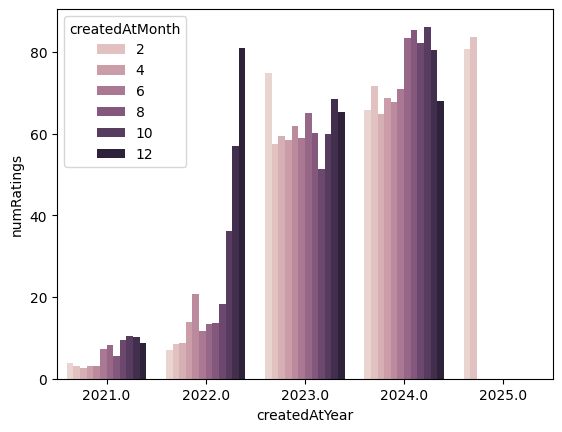

In [103]:
sns.barplot(data=rated_monthly, x='createdAtYear', y='numRatings', hue='createdAtMonth')

Obviously, notes are not short of ratings!

## RDD
Our approach: check helpfulness scores of the first notes from each author in 2024. Check if they have written another note.

In [3]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]

In [123]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'createdAtMillis', 'createdAt',
       'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [37]:
first_notes = rated_2024.groupby('noteAuthorParticipantId')\
    [['finalRatingStatus', 'numRatings', 'decidedBy','coreNoteIntercept', 'coreNoteInterceptMax']]\
    .first().reset_index()
have_another_note = rated_2024[rated_2024.groupby('noteAuthorParticipantId').cumcount() >= 2]\
    ['noteAuthorParticipantId'].to_list()
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)

In [38]:
# just focus on core model for now
first_notes = first_notes[first_notes['decidedBy'] == 'CoreModel (v1.1)']

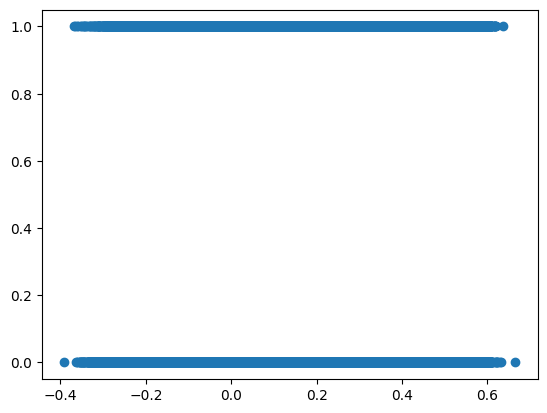

In [128]:
plt.scatter(x=first_notes['coreNoteIntercept'], y=first_notes['if_written_again'])

In [48]:
window = 0.1
df_higher = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4)]
df_lower = first_notes[(first_notes['coreNoteIntercept'] < .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
# another df including all
df_RDD = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
df_RDD['group'] = df_RDD['finalRatingStatus'].apply(lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0)

/tmp/ipykernel_15596/2275757671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RDD['group'] = df_RDD['finalRatingStatus'].apply(lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0)


In [10]:
(len(first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 )])) / len(df_window)

0.4697351193473663

In [23]:
df_higher['if_written_again'].mean()

np.float64(0.5340380549682875)

In [24]:
df_lower['if_written_again'].mean()

np.float64(0.4889975550122249)

In [49]:
# fit linear regression
RDD = linear_model.LogisticRegression()
RDD.fit(df_RDD[['group', 'coreNoteIntercept']], df_RDD['if_written_again'])

LogisticRegression()

In [ ]:
RDD.coef_

array([[-0.17647577,  1.5702995 ]])

In [35]:
df_RDD[['finalRatingStatus', 'coreNoteIntercept', 'coreNoteInterceptMax']]

,finalRatingStatus,coreNoteIntercept,coreNoteInterceptMax
13,NEEDS_MORE_RATINGS,0.415720,0.419939
45,NEEDS_MORE_RATINGS,0.384220,0.388377
98,NEEDS_MORE_RATINGS,0.424668,0.451081
165,NEEDS_MORE_RATINGS,0.388664,0.431049
260,NEEDS_MORE_RATINGS,0.395331,0.410247
...,...,...,...
185626,CURRENTLY_RATED_HELPFUL,0.408510,0.437879
185669,NEEDS_MORE_RATINGS,0.406842,0.421612
185685,NEEDS_MORE_RATINGS,0.377074,0.392348
185706,CURRENTLY_RATED_HELPFUL,0.390212,0.488393


Let's check from 2 to 3. If publishing your 2nd note make you more likely to publish your 3rd?

In [ ]:
first_notes = rated_2024.groupby('noteAuthorParticipantId')\
    [['finalRatingStatus', 'numRatings', 'decidedBy','coreNoteIntercept', 'coreNoteInterceptMax']]\
    .first(2).reset_index()
have_another_note = rated_2024[rated_2024.groupby('noteAuthorParticipantId').cumcount() >= 3]\
    ['noteAuthorParticipantId'].to_list()
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)
# just focus on core model for now
first_notes = first_notes[first_notes['decidedBy'] == 'CoreModel (v1.1)']
window = 0.1
df_higher = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4)]
df_lower = first_notes[(first_notes['coreNoteIntercept'] < .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
# another df including all
df_RDD = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
df_RDD['group'] = df_RDD['finalRatingStatus'].apply(lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0)
(len(first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 )])) / len(df_window)
df_higher['if_written_again'].mean()
df_lower['if_written_again'].mean()
# fit linear regression
RDD = linear_model.LogisticRegression()
RDD.fit(df_RDD[['group', 'coreNoteIntercept']], df_RDD['if_written_again'])
RDD.coef_

In [47]:
first_notes[(first_notes['finalRatingStatus'] == 'CurrentlyRatedHelpful') != (first_notes['coreNoteIntercept'] > .4)]

,noteAuthorParticipantId,finalRatingStatus,numRatings,decidedBy,coreNoteIntercept,coreNoteInterceptMax,if_written_again
13,0005983E6E18862483AB372C5B61FEBC1F8A573E7701F9...,NEEDS_MORE_RATINGS,3,CoreModel (v1.1),0.415720,0.419939,True
47,001383DCF62DE23333BBB705037B6FABAF3B3AF71B029E...,CURRENTLY_RATED_HELPFUL,44,CoreModel (v1.1),0.458651,0.486539,False
66,001794B428DE0EE3EF12D59C540D90775F9E2C54A287FE...,CURRENTLY_RATED_HELPFUL,351,CoreModel (v1.1),0.567581,0.571153,True
98,00261DACD08CB66FC13A29360863EBA8AB56CC9E43B803...,NEEDS_MORE_RATINGS,247,CoreModel (v1.1),0.424668,0.451081,False
110,002CC6530A91707CBD2863FA9D55197FD120B3CB0E3213...,CURRENTLY_RATED_HELPFUL,291,CoreModel (v1.1),0.455981,0.474176,True
...,...,...,...,...,...,...,...
185630,FFD8B86CCB8A18186DE836A7AD1D9F656C2D20E9CCD5E1...,CURRENTLY_RATED_HELPFUL,112,CoreModel (v1.1),0.534271,0.559834,True
185669,FFE831EF3570F5C6570C9FF33E9E4B36062D4027338C76...,NEEDS_MORE_RATINGS,93,CoreModel (v1.1),0.406842,0.421612,False
185677,FFEA476D3DF9AB7B8E41AFA9940FA29E592A465B03D883...,CURRENTLY_RATED_HELPFUL,129,CoreModel (v1.1),0.552242,0.559603,False
185681,FFEB95C853A216E03FE07069C0B74A87400D8213639E60...,CURRENTLY_RATED_HELPFUL,130,CoreModel (v1.1),0.513418,0.521501,False


### RDD with another dataset
Check if publishing make authors more likely to write another note within the next 3 months.

In [3]:

rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated['createdAt'].max()


Timestamp('2025-02-24 03:36:28.959000')

In [4]:
# since our last note is written at 2025-02-24 we restric our last first note to 23 Nov 2024
# so the second note can be within 3 months from the first note.
rated_RDD = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1))]

In [74]:
# Find the first note written by each author, and if that author goes on to write another note
first_note_authors = rated_RDD.groupby('noteAuthorParticipantId')[['createdAt']].first().reset_index()
eligible_authors = first_note_authors[first_note_authors['createdAt'] <= pd.Timestamp(2024, 10, 23)]\
    ['noteAuthorParticipantId'].to_list()
first_notes = rated_RDD[rated_RDD['noteAuthorParticipantId'].isin(eligible_authors)]\
    .groupby('noteAuthorParticipantId').head(2)
first_notes = first_notes.sort_values(['noteAuthorParticipantId', 'createdAt'])
# mask to ensure the second note was written less than 3 months aftr the first one
mask_90 = ((first_notes['createdAt'] - first_notes['createdAt']\
         .groupby(first_notes['noteAuthorParticipantId']).shift()).dt.days <= 90)\
            .groupby(first_notes['noteAuthorParticipantId'])\
            .transform('any')
have_another_note = first_notes[mask_90].groupby('noteAuthorParticipantId')[['createdAt']]\
    .first().reset_index()['noteAuthorParticipantId'].to_list()
# update first notes to include only first note not the seconds
first_notes = first_notes.groupby('noteAuthorParticipantId').head(1)
# add a column 
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)

In [76]:
# notes are scored by multiuple algorithms, but nearly 80% are scored by the core model
#  for now  restrict our analysis to thismodel
first_notes = first_notes[first_notes['decidedBy'] == 'CoreModel (v1.1)']

/tmp/ipykernel_4663/2255001828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_notes['log_numRatings']=np.log(first_notes['numRatings'])


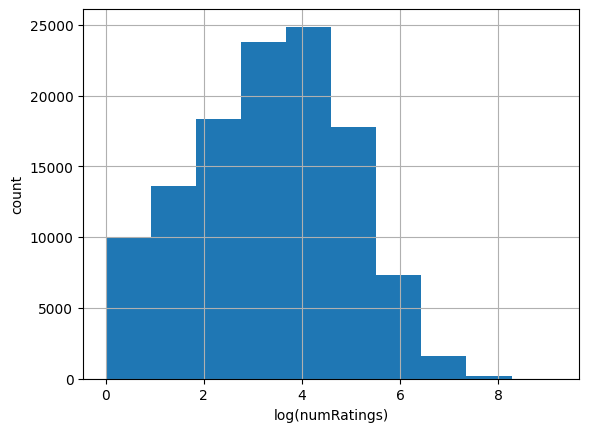

In [77]:
# Most notes have a small number of rating, a small number have very many ratinhgs
# This means the distribution of ratings is very skewed.
# We take the log of the number of ratings to make the distribution more normal


first_notes['log_numRatings']=np.log(first_notes['numRatings'])

first_notes['log_numRatings'].hist() #normal
plt.xlabel('log(numRatings)')
plt.ylabel('count')
plt.show()



In [78]:
# Most notes don't receive enough ratings to be labelled helpful (and shown), or label unhelpful

first_notes['finalRatingStatus'].value_counts()

finalRatingStatus
NEEDS_MORE_RATINGS             104861
CURRENTLY_RATED_HELPFUL          7867
CURRENTLY_RATED_NOT_HELPFUL      4782
Name: count, dtype: int64

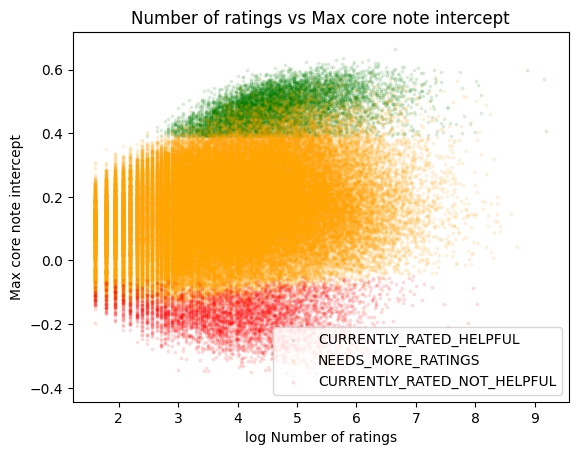

In [80]:
# Plotting log(numRatings) vs coreNoteInterceptMax, with colours according to Note final statuys (finalRatingStatus )  
plt.clf()
groups = ['CURRENTLY_RATED_HELPFUL','NEEDS_MORE_RATINGS','CURRENTLY_RATED_NOT_HELPFUL']
colours=['green','orange','red']

ms=3;alphaval=0.1;

for i in range(3):
    plt.scatter(first_notes[first_notes['finalRatingStatus']==groups[i]]['log_numRatings'], first_notes[first_notes['finalRatingStatus']==groups[i]]['coreNoteIntercept'], s = ms,alpha=alphaval,color=colours[i],label=groups[i])  
    i+=1

plt.xlabel('log Number of ratings')
plt.ylabel('Max core note intercept')
plt.title('Number of ratings vs Max core note intercept')
plt.legend(loc=0)
plt.savefig('scatter_numRatings_coreNoteIntercept.png',dpi=120,bbox_inches='tight')
plt.show()

#TODO make the legend markers bigger and clearer

In [81]:
# RDD 

cutoff = 0.4 #threshold at which a note is rated as helpful
bandwidth = 0.05 #window around cutoff

# We fit a model allowing for different intercepts and slopes on either side of the cutoff.

# most recent score
running_variable = first_notes['coreNoteIntercept'] # x value, continuous input

# highest score
#running_variable = first_notes['coreNoteInterceptMax'] # x value, continuous input

# Treatment = 1 if running_variable >= cutoff, else 0
treatment = np.where(running_variable >= cutoff, 1, 0)

#
outcome_variable = first_notes['if_written_again'].astype(int) # y value, binary output

# we can restrict the analysis to a window (bandwidth) around the cutoff.

mask = (running_variable > cutoff - bandwidth)  & (running_variable < cutoff + bandwidth)

data = pd.DataFrame({
    'running_variable': running_variable[mask],
    'treatment': treatment[mask],
    'outcome_variable': outcome_variable[mask],
    'control' : first_notes[mask]['log_numRatings'],
    'numRatings' : first_notes[mask]['numRatings']
})

# Center the running variable at the cutoff for easier interpretation of the intercept
data['running_variable_centered'] = data['running_variable'] - cutoff

print("Sample Data Head:")
print(data.head())
print(f"\nNumber of treated units: {data['treatment'].sum()}")
print(f"Number of control units: {data['treatment'].count() - data['treatment'].sum()}")


Sample Data Head:
         running_variable  treatment  outcome_variable   control  numRatings  \
1126091          0.424668          1                 0  5.509388         247   
607376           0.388664          0                 1  4.770685         118   
740272           0.372257          0                 0  4.442651          85   
572116           0.355715          0                 0  4.454347          86   
1349613          0.437888          1                 0  4.143135          63   

         running_variable_centered  
1126091                   0.024668  
607376                   -0.011336  
740272                   -0.027743  
572116                   -0.044285  
1349613                   0.037888  

Number of treated units: 3455
Number of control units: 3872


In [82]:
#let's see how many notes are in our analysis, around the cutoff

data.groupby('treatment')['numRatings'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,3872.0,138.570506,191.522101,8.0,42.0,82.0,156.0,3042.0
1,3455.0,139.368741,262.059680,12.0,47.0,78.0,148.5,9806.0


In [85]:

# original
rdd_model_formula = 'outcome_variable ~ running_variable_centered * treatment'
#rdd_model_formula = 'outcome_variable ~ running_variable_centered * treatment + control'
rdd_model = smf.ols(formula=rdd_model_formula, data=data).fit()

print("\nRDD Model Summary (using all data):")
print(rdd_model.summary())


RDD Model Summary (using all data):
                            OLS Regression Results                            
Dep. Variable:       outcome_variable   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.997
Date:                Sat, 10 May 2025   Prob (F-statistic):             0.0295
Time:                        13:28:52   Log-Likelihood:                -5174.5
No. Observations:                7327   AIC:                         1.036e+04
Df Residuals:                    7323   BIC:                         1.038e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [86]:
# The coefficient for 'treatment' is the estimated effect at the cutoff.
estimated_effect = rdd_model.params['treatment']
print(f"\nEstimated Treatment Effect at the Cutoff: {estimated_effect:.4f}")

print("I think we can intepret this as a % change the chance of authoring again if published")

p_value_treatment = rdd_model.pvalues['treatment']
t_statistic_treatment = rdd_model.tvalues['treatment']
conf_int_treatment = rdd_model.conf_int().loc['treatment']

# print out p value and t-statistic for treatment
print(f"\nP-value for treatment: {p_value_treatment:.4f}")
print(f"T-statistic for treatment: {t_statistic_treatment:.4f}")
print(f"Confidence interval for treatment: " + str(conf_int_treatment))




Estimated Treatment Effect at the Cutoff: 0.0354
I think we can intepret this as a % change the chance of authoring again if published

P-value for treatment: 0.1194
T-statistic for treatment: 1.5575
Confidence interval for treatment: 0   -0.009151
1    0.079929
Name: treatment, dtype: float64


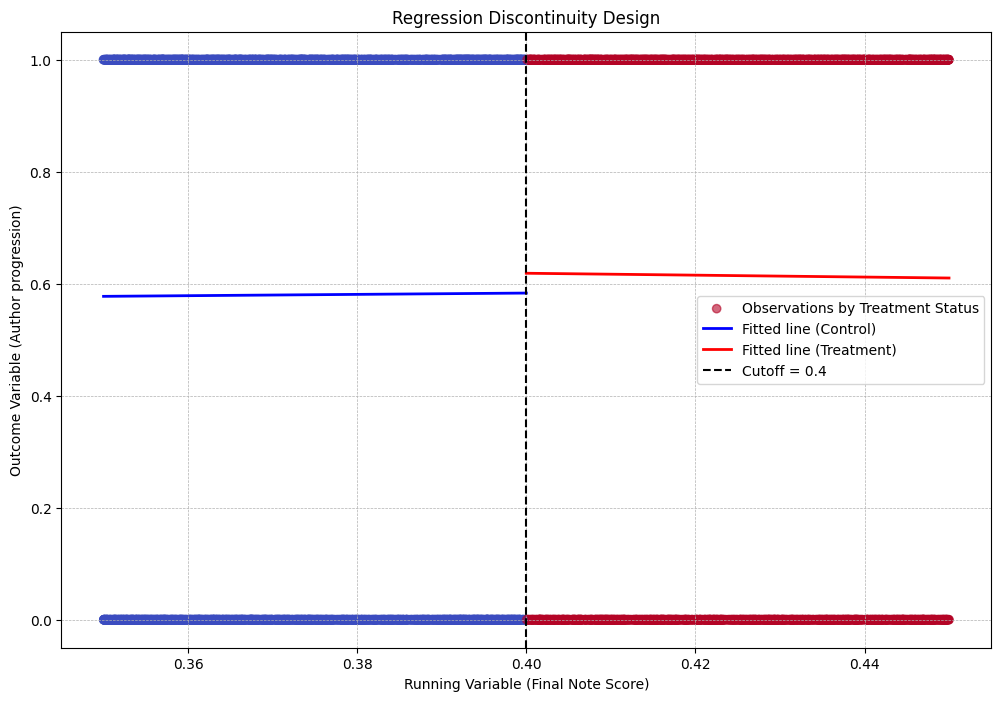

In [87]:
# 3. Visualization
plt.figure(figsize=(12, 8))
plt.scatter(data['running_variable'], data['outcome_variable'],
            c=data['treatment'], cmap='coolwarm', alpha=0.6, label='Observations by Treatment Status')

# Plot regression lines for each side of the cutoff
# For values below the cutoff (treatment=0)
x_below = np.linspace(data['running_variable'].min(), cutoff, 100)
y_below = rdd_model.params['Intercept'] + rdd_model.params['running_variable_centered'] * (x_below - cutoff)

# For values above the cutoff (treatment=1)
x_above = np.linspace(cutoff, data['running_variable'].max(), 100)
y_above = (rdd_model.params['Intercept'] + rdd_model.params['treatment']) + \
          (rdd_model.params['running_variable_centered'] + rdd_model.params['running_variable_centered:treatment']) * (x_above - cutoff)

plt.plot(x_below, y_below, color='blue', linestyle='-', linewidth=2, label='Fitted line (Control)')
plt.plot(x_above, y_above, color='red', linestyle='-', linewidth=2, label='Fitted line (Treatment)')

plt.axvline(x=cutoff, color='black', linestyle='--', label=f'Cutoff = {cutoff}')
plt.xlabel('Running Variable (Final Note Score)')
plt.ylabel('Outcome Variable (Author progression)')
plt.title('Regression Discontinuity Design')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('plots/RDD.png',bbox_inches='tight',dpi=120)
plt.show()



### RDD from 2nd to 3rd note

In [ ]:
# # Find the first note written by each author, and if that author goes on to write another note
# # first_note_authors = rated_RDD.groupby('noteAuthorParticipantId')[['createdAt']].first().reset_index()
# # eligible_authors = first_note_authors[first_note_authors['createdAt'] <= pd.Timestamp(2024, 10, 23)]\
# #     ['noteAuthorParticipantId'].to_list()
# first_notes = rated_RDD.groupby('noteAuthorParticipantId').head(3)\
#         .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[1:, 1:])
# first_notes = first_notes.sort_values(['noteAuthorParticipantId', 'createdAt'])
# # mask to ensure the second note was written less than 3 months aftr the first one
# mask_90 = ((first_notes['createdAt'] - first_notes['createdAt']\
#          .groupby(first_notes['noteAuthorParticipantId']).shift()).dt.days <= 90)\
#             .groupby(first_notes['noteAuthorParticipantId'])\
#             .transform('any')
# have_another_note = first_notes[mask_90].groupby('noteAuthorParticipantId')[['createdAt']]\
#     .first().reset_index()['noteAuthorParticipantId'].to_list()
# # update first notes to include only first note not the seconds
# first_notes = first_notes.groupby('noteAuthorParticipantId').head(1)
# # add a column 
# first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)

In [5]:
first_notes = rated_RDD.groupby('noteAuthorParticipantId').head(3)\
        .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[1:, 1:])

/tmp/ipykernel_3863/4010706947.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[1:, 1:])


In [11]:
first_notes = first_notes\
    [['createdAt', 'finalRatingStatus', 'numRatings', 'decidedBy','coreNoteIntercept', 'coreNoteInterceptMax']]\
        .reset_index()

In [12]:
first_notes = first_notes.sort_values(['noteAuthorParticipantId', 'createdAt'])
# mask to ensure the second note was written less than 3 months aftr the first one
mask_90 = ((first_notes['createdAt'] - first_notes['createdAt']\
         .groupby(first_notes['noteAuthorParticipantId']).shift()).dt.days <= 90)\
            .groupby(first_notes['noteAuthorParticipantId'])\
            .transform('any')
have_another_note = first_notes[mask_90].groupby('noteAuthorParticipantId')[['createdAt']]\
    .first().reset_index()['noteAuthorParticipantId'].to_list()
# update first notes to include only first note not the seconds
first_notes = first_notes.groupby('noteAuthorParticipantId').head(1)
# add a column 
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)

In [15]:
# remove the ones whose last note have not been around for 3 months before 24 feb 2025 (end of dataset)
first_notes = first_notes[first_notes['createdAt'] <= pd.Timestamp(2024, 10, 23)]

In [18]:
# Most notes have a small number of rating, a small number have very many ratinhgs
# This means the distribution of ratings is very skewed.
# We take the log of the number of ratings to make the distribution more normal


first_notes['log_numRatings']=np.log(first_notes['numRatings'])

# first_notes['log_numRatings'].hist() #normal
# plt.xlabel('log(numRatings)')
# plt.ylabel('count')
# plt.show()



/home/zahra/Documents/Tom_Stafford/Community_Notes/analysis/community_notes/.env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3863/3972077843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_notes['log_numRatings']=np.log(first_notes['numRatings'])


In [19]:
# RDD 

cutoff = 0.4 #threshold at which a note is rated as helpful
bandwidth = 0.05 #window around cutoff

# We fit a model allowing for different intercepts and slopes on either side of the cutoff.

# most recent score
running_variable = first_notes['coreNoteIntercept'] # x value, continuous input

# highest score
#running_variable = first_notes['coreNoteInterceptMax'] # x value, continuous input

# Treatment = 1 if running_variable >= cutoff, else 0
treatment = np.where(running_variable >= cutoff, 1, 0)

#
outcome_variable = first_notes['if_written_again'].astype(int) # y value, binary output

# we can restrict the analysis to a window (bandwidth) around the cutoff.

mask = (running_variable > cutoff - bandwidth)  & (running_variable < cutoff + bandwidth)

data = pd.DataFrame({
    'running_variable': running_variable[mask],
    'treatment': treatment[mask],
    'outcome_variable': outcome_variable[mask],
    'control' : first_notes[mask]['log_numRatings'],
    'numRatings' : first_notes[mask]['numRatings']
})

# Center the running variable at the cutoff for easier interpretation of the intercept
data['running_variable_centered'] = data['running_variable'] - cutoff

print("Sample Data Head:")
print(data.head())
print(f"\nNumber of treated units: {data['treatment'].sum()}")
print(f"Number of control units: {data['treatment'].count() - data['treatment'].sum()}")


Sample Data Head:
     running_variable  treatment  outcome_variable   control  numRatings  \
78           0.381973          0                 0  4.369448          79   
93           0.371758          0                 1  4.753590         116   
99           0.351911          0                 1  3.784190          44   
123          0.449498          1                 1  5.332719         207   
166          0.408787          1                 0  3.761200          43   

     running_variable_centered  
78                   -0.018027  
93                   -0.028242  
99                   -0.048089  
123                   0.049498  
166                   0.008787  

Number of treated units: 2466
Number of control units: 3216


In [20]:
#let's see how many notes are in our analysis, around the cutoff

data.groupby('treatment')['numRatings'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,3216.0,129.062189,191.895902,9.0,38.0,71.0,144.0,3182.0
1,2466.0,156.090430,227.284612,11.0,52.0,90.0,171.0,3211.0


In [26]:

# original
rdd_model_formula = 'outcome_variable ~ running_variable_centered * treatment'
# rdd_model_formula = 'outcome_variable ~ running_variable_centered * treatment + control'
rdd_model = smf.ols(formula=rdd_model_formula, data=data).fit()

print("\nRDD Model Summary (using all data):")
print(rdd_model.summary())


RDD Model Summary (using all data):
                            OLS Regression Results                            
Dep. Variable:       outcome_variable   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.742
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.156
Time:                        13:56:23   Log-Likelihood:                -3577.3
No. Observations:                5682   AIC:                             7163.
Df Residuals:                    5678   BIC:                             7189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [27]:
# The coefficient for 'treatment' is the estimated effect at the cutoff.
estimated_effect = rdd_model.params['treatment']
print(f"\nEstimated Treatment Effect at the Cutoff: {estimated_effect:.4f}")

print("I think we can intepret this as a % change the chance of authoring again if published")

p_value_treatment = rdd_model.pvalues['treatment']
t_statistic_treatment = rdd_model.tvalues['treatment']
conf_int_treatment = rdd_model.conf_int().loc['treatment']

# print out p value and t-statistic for treatment
print(f"\nP-value for treatment: {p_value_treatment:.4f}")
print(f"T-statistic for treatment: {t_statistic_treatment:.4f}")
print(f"Confidence interval for treatment: " + str(conf_int_treatment))




Estimated Treatment Effect at the Cutoff: -0.0164
I think we can intepret this as a % change the chance of authoring again if published

P-value for treatment: 0.5014
T-statistic for treatment: -0.6723
Confidence interval for treatment: 0   -0.064190
1    0.031406
Name: treatment, dtype: float64


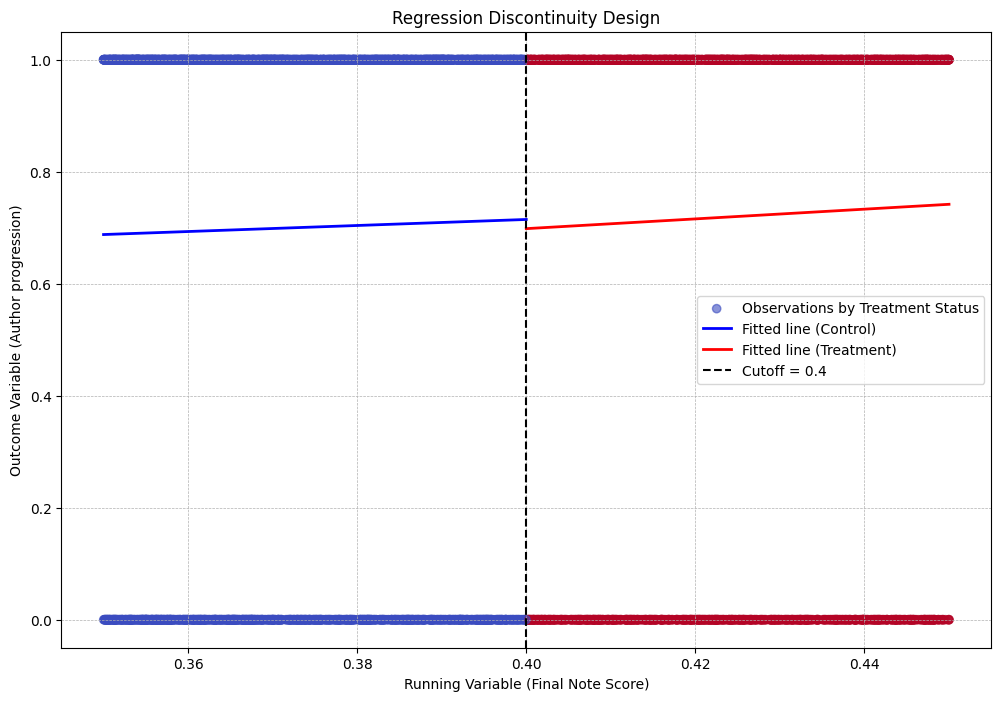

In [23]:
# 3. Visualization
plt.figure(figsize=(12, 8))
plt.scatter(data['running_variable'], data['outcome_variable'],
            c=data['treatment'], cmap='coolwarm', alpha=0.6, label='Observations by Treatment Status')

# Plot regression lines for each side of the cutoff
# For values below the cutoff (treatment=0)
x_below = np.linspace(data['running_variable'].min(), cutoff, 100)
y_below = rdd_model.params['Intercept'] + rdd_model.params['running_variable_centered'] * (x_below - cutoff)

# For values above the cutoff (treatment=1)
x_above = np.linspace(cutoff, data['running_variable'].max(), 100)
y_above = (rdd_model.params['Intercept'] + rdd_model.params['treatment']) + \
          (rdd_model.params['running_variable_centered'] + rdd_model.params['running_variable_centered:treatment']) * (x_above - cutoff)

plt.plot(x_below, y_below, color='blue', linestyle='-', linewidth=2, label='Fitted line (Control)')
plt.plot(x_above, y_above, color='red', linestyle='-', linewidth=2, label='Fitted line (Treatment)')

plt.axvline(x=cutoff, color='black', linestyle='--', label=f'Cutoff = {cutoff}')
plt.xlabel('Running Variable (Final Note Score)')
plt.ylabel('Outcome Variable (Author progression)')
plt.title('Regression Discontinuity Design')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('plots/RDD.png',bbox_inches='tight',dpi=120)
plt.show()

